---
# Stack Overflow Platform Analysis
Team 3: Dhruv Shah, Jessica Tong, Celest Chen, Sike Yang

---
## Project Proposal and Data Source
Founded in 2008, Stack Overflow is a cornerstone of the online developer community, providing a platform for knowledge sharing and problem-solving. Understanding user behavior and content trends is crucial for optimizing the platform and keeping users engaged. This project proposes a comprehensive analysis of Stack Overflow user data to uncover valuable insights for improving the platform's user experience and overall effectiveness.

We'll delve into user engagement patterns, identify content trends like popular programming languages, and analyze user expertise through badges and reputation scores. By employing techniques like frequency analysis, we'll uncover valuable insights to inform platform improvements. These include targeted support based on peak posting times, content creation focused on popular languages, and strategies to optimize user onboarding and retention. Ultimately, the project will deliver a report with actionable recommendations, data visualizations, and a public code repository for further exploration.

This dataset is from Google Cloud's BigQuery public data. It contains 16 data tables under Stack Overflow, including tables for badges, comments, users,  votes, etc. Through analyzing its historical data, which ranges from 2008 to 2022, of the **users, stackoverflow_posts, posts_questions, posts_answers, comments, badges and post history** tables from Google Cloud's BigQuery public data, we hope to uncover the answer to those questions, and to provide valuable business insights to avoid potential threats and risks.

Data Source: https://console.cloud.google.com/bigquery?referrer=search&authuser=0&project=qst843-ycc&ws=!1m4!1m3!3m2!1sbigquery-public-data!2sstackoverflow


---
## Introduction and Motivation
Stack Overflow, the go-to platform for programmers seeking answers and sharing knowledge, thrives on a vibrant user community. However, understanding user behavior and content consumption patterns is essential to keep users engaged and the platform functioning optimally. This project is driven by a desire to leverage the power of data analysis to unlock valuable insights from Stack Overflow's user data.

Here's what particularly motivates this project:

**Optimizing User Experience:** By understanding user behavior through metrics like post lifespan and popular posting days, we can tailor support and features to better serve users.

**Data-Driven Content Strategy:** Identifying prevalent programming languages and user origins can inform the creation of targeted content and resources, ensuring users find the information they need most readily.

**Enhancing User Engagement:** Analyzing user retention and badge distribution can shed light on user motivation and expertise. This knowledge can lead to strategies that keep users coming back and actively participating in the community.

**Evaluating Platform Effectiveness:** Examining trends in question answer rates and answer quality over time helps assess the overall health of the platform and identify areas for improvement.

---
## Executive Summary

Our Stack Overflow project utilized Google BigQuery to prioritize data quality through a rigorous cleaning process, examining null values, eliminating irrelevant data, and generating descriptive statistics on user reputation, engagement metrics, and dataset date range. We then explored the Questions and Answers section, focusing on **User Data, Content Data, and Badges**. This analysis identified user behavior and content trends, including average post lifespan, most prevalent programming languages, user origins via cleaned location data, churn rate, and the most popular day for new questions. K-means clustering revealed three user groups: loyal users with high reputation, newer users with lower reputation, and an intermediate majority. To gain deeper insights into user engagement, we merged user and badge data, analyzing user badge distribution and reputation scores. Finally, we examined trends in answered questions and average answer scores across different years. This comprehensive analysis offers valuable information on Stack Overflow's user base and content, informing future platform strategies.


---
## Exploratory Data Analysis

**Summary:** To begin our exploration of Stack Overflow user data, we directly imported all relevant tables from BigQuery. A data description table has been added to aid anyone reading this report to understand the data we are working with. For data cleaning we found the proportions of null values for each column for all the tables we used.We then addressed data quality by removing duplicates and eliminating irrelevant columns with excessive missing values.  Following this cleaning process, we delved into descriptive statistics for each table, uncovering interesting trends and characteristics that will be further explored in the following code cells. This initial analysis also revealed the date range of our dataset and the total number of users we'll be examining throughout this project.

---
### Importing Data

In [ ]:
import pandas as pd
from pyspark.sql import functions as F

In [ ]:
# Importing Users table from BigQuery
users = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.users') \
  .load()

users.printSchema()

root
 |-- id: long (nullable = true)
 |-- display_name: string (nullable = true)
 |-- about_me: string (nullable = true)
 |-- age: string (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- last_access_date: timestamp (nullable = true)
 |-- location: string (nullable = true)
 |-- reputation: long (nullable = true)
 |-- up_votes: long (nullable = true)
 |-- down_votes: long (nullable = true)
 |-- views: long (nullable = true)
 |-- profile_image_url: string (nullable = true)
 |-- website_url: string (nullable = true)



| Column                | Description                                                                                           |
|-----------------------|-------------------------------------------------------------------------------------------------------|
| id                    | Unique identifier for each user.                                                                     |
| display_name          | Display name of the user.                                                                            |
| about_me              | Description or bio provided by the user.                                                             |
| age                   | Age of the user.                                                                                      |
| creation_date         | Date and time when the user account was created.                                                     |
| last_access_date      | Date and time when the user last accessed Stack Overflow.                                             |
| location              | Location information provided by the user.                                                            |
| reputation            | Reputation score of the user on Stack Overflow.                                                       |
| up_votes              | Total number of upvotes received by the user for their posts or comments.                              |
| down_votes            | Total number of downvotes received by the user for their posts or comments.                            |
| views                 | Total number of views on the user's posts or profile.                                                 |
| profile_image_url     | URL of the user's profile image.                                                                     |
| website_url           | URL of the user's website, if provided.                                                               |


In [ ]:
# Importing Stackoverflow_posts table from BigQuery
stackoverflow_posts = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.stackoverflow_posts') \
  .load()

stackoverflow_posts.printSchema()

root
 |-- id: long (nullable = false)
 |-- title: string (nullable = true)
 |-- body: string (nullable = true)
 |-- accepted_answer_id: long (nullable = true)
 |-- answer_count: long (nullable = true)
 |-- comment_count: long (nullable = true)
 |-- community_owned_date: timestamp (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- favorite_count: long (nullable = true)
 |-- last_activity_date: timestamp (nullable = true)
 |-- last_edit_date: timestamp (nullable = true)
 |-- last_editor_display_name: string (nullable = true)
 |-- last_editor_user_id: long (nullable = true)
 |-- owner_display_name: string (nullable = true)
 |-- owner_user_id: long (nullable = true)
 |-- parent_id: long (nullable = true)
 |-- post_type_id: long (nullable = true)
 |-- score: long (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: long (nullable = true)



| Column                   | Description                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------|
| id                       | Unique identifier for each post.                                                                     |
| title                    | Title of the post.                                                                                   |
| body                     | Body or content of the post.                                                                         |
| accepted_answer_id       | ID of the accepted answer, if applicable.                                                            |
| answer_count             | Total number of answers received for the post.                                                       |
| comment_count            | Total number of comments on the post.                                                                |
| community_owned_date     | Date and time when the post was marked as community-owned.                                            |
| creation_date            | Date and time when the post was created.                                                             |
| favorite_count           | Total number of times the post was marked as a favorite by users.                                     |
| last_activity_date       | Date and time of the last activity on the post.                                                       |
| last_edit_date           | Date and time of the last edit made to the post.                                                      |
| last_editor_display_name| Display name of the user who last edited the post.                                                    |
| last_editor_user_id      | ID of the user who last edited the post.                                                             |
| owner_display_name       | Display name of the user who owns the post.                                                           |
| owner_user_id            | ID of the user who owns the post.                                                                    |
| parent_id                | ID of the parent post, if the post is an answer to another post.                                      |
| post_type_id             | Type of post (question or answer).                                                                   |
| score                    | Score of the post, indicating its popularity or quality based on upvotes and downvotes.               |
| tags                     | Tags associated with the post, indicating its topic or subject matter.                                |
| view_count               | Total number of views on the post.                                                                   |


In [ ]:
# Importing posts_questions table from BigQuery
posts_questions = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.posts_questions') \
  .load()

posts_questions.printSchema()

root
 |-- id: long (nullable = true)
 |-- title: string (nullable = true)
 |-- body: string (nullable = true)
 |-- accepted_answer_id: long (nullable = true)
 |-- answer_count: long (nullable = true)
 |-- comment_count: long (nullable = true)
 |-- community_owned_date: timestamp (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- favorite_count: long (nullable = true)
 |-- last_activity_date: timestamp (nullable = true)
 |-- last_edit_date: timestamp (nullable = true)
 |-- last_editor_display_name: string (nullable = true)
 |-- last_editor_user_id: long (nullable = true)
 |-- owner_display_name: string (nullable = true)
 |-- owner_user_id: long (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- post_type_id: long (nullable = true)
 |-- score: long (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: long (nullable = true)



| Column                   | Description                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------|
| id                       | Unique identifier for each question post.                                                             |
| title                    | Title of the question.                                                                               |
| body                     | Body or content of the question.                                                                     |
| accepted_answer_id       | ID of the accepted answer for the question, if applicable.                                            |
| answer_count             | Total number of answers received for the question.                                                    |
| comment_count            | Total number of comments on the question.                                                             |
| community_owned_date     | Date and time when the question was marked as community-owned.                                        |
| creation_date            | Date and time when the question was created.                                                          |
| favorite_count           | Total number of times the question was marked as a favorite by users.                                  |
| last_activity_date       | Date and time of the last activity on the question.                                                   |
| last_edit_date           | Date and time of the last edit made to the question.                                                  |
| last_editor_display_name| Display name of the user who last edited the question.                                                 |
| last_editor_user_id      | ID of the user who last edited the question.                                                          |
| owner_display_name       | Display name of the user who asked the question.                                                      |
| owner_user_id            | ID of the user who asked the question.                                                                |
| parent_id                | ID of the parent post, if the question is a part of another post.                                     |
| post_type_id             | Type of post (question or answer).                                                                    |
| score                    | Score of the question, indicating its popularity or quality based on upvotes and downvotes.            |
| tags                     | Tags associated with the question, indicating its topic or subject matter.                             |
| view_count               | Total number of views on the question.                                                                |


In [ ]:
# Importing posts_answers table from BigQuery
posts_answers = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.posts_answers') \
  .load()

posts_answers.printSchema()

root
 |-- id: long (nullable = true)
 |-- title: string (nullable = true)
 |-- body: string (nullable = true)
 |-- accepted_answer_id: string (nullable = true)
 |-- answer_count: string (nullable = true)
 |-- comment_count: long (nullable = true)
 |-- community_owned_date: timestamp (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- favorite_count: string (nullable = true)
 |-- last_activity_date: timestamp (nullable = true)
 |-- last_edit_date: timestamp (nullable = true)
 |-- last_editor_display_name: string (nullable = true)
 |-- last_editor_user_id: long (nullable = true)
 |-- owner_display_name: string (nullable = true)
 |-- owner_user_id: long (nullable = true)
 |-- parent_id: long (nullable = true)
 |-- post_type_id: long (nullable = true)
 |-- score: long (nullable = true)
 |-- tags: string (nullable = true)
 |-- view_count: string (nullable = true)



| Column                   | Description                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------|
| id                       | Unique identifier for each answer post.                                                               |
| title                    | Title of the answer.                                                                                 |
| body                     | Body or content of the answer.                                                                       |
| accepted_answer_id       | ID of the accepted answer for the question, if applicable.                                            |
| answer_count             | Total number of answers received for the question.                                                    |
| comment_count            | Total number of comments on the answer.                                                               |
| community_owned_date     | Date and time when the answer was marked as community-owned.                                          |
| creation_date            | Date and time when the answer was created.                                                            |
| favorite_count           | Total number of times the answer was marked as a favorite by users.                                    |
| last_activity_date       | Date and time of the last activity on the answer.                                                      |
| last_edit_date           | Date and time of the last edit made to the answer.                                                     |
| last_editor_display_name| Display name of the user who last edited the answer.                                                   |
| last_editor_user_id      | ID of the user who last edited the answer.                                                            |
| owner_display_name       | Display name of the user who posted the answer.                                                       |
| owner_user_id            | ID of the user who posted the answer.                                                                 |
| parent_id                | ID of the parent question post to which the answer belongs.                                            |
| post_type_id             | Type of post (question or answer).                                                                    |
| score                    | Score of the answer, indicating its popularity or quality based on upvotes and downvotes.             |
| tags                     | Tags associated with the parent question, indicating its topic or subject matter.                      |
| view_count               | Total number of views on the answer.                                                                  |


In [ ]:
# Importing comments table from BigQuery
comments = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.comments') \
  .load()

comments.printSchema()

root
 |-- id: long (nullable = true)
 |-- text: string (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- post_id: long (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_display_name: string (nullable = true)
 |-- score: long (nullable = true)



| Column              | Description                                                                                   |
|---------------------|-----------------------------------------------------------------------------------------------|
| id                  | Unique identifier for each comment.                                                           |
| text                | Text content of the comment.                                                                 |
| creation_date       | Date and time when the comment was created.                                                   |
| post_id             | ID of the post to which the comment is associated.                                            |
| user_id             | ID of the user who posted the comment.                                                         |
| user_display_name   | Display name of the user who posted the comment.                                               |
| score               | Score of the comment, indicating its popularity or quality based on upvotes and downvotes.    |


In [ ]:
# Importing badges table from BigQuery
badges = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.badges') \
  .load()

badges.printSchema()

root
 |-- id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- user_id: long (nullable = true)
 |-- class: long (nullable = true)
 |-- tag_based: boolean (nullable = true)



| Column         | Description                                                                                   |
|----------------|-----------------------------------------------------------------------------------------------|
| id             | Unique identifier for each badge.                                                             |
| name           | Name of the badge.                                                                            |
| date           | Date and time when the badge was awarded or earned.                                           |
| user_id        | ID of the user who received the badge.                                                        |
| class          | Class or category of the badge.                                                               |
| tag_based      | Indicates whether the badge is tag-based (True/False).                                         |


In [ ]:
# Importing post_history table from BigQuery
post_history = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.post_history') \
  .load()

post_history.printSchema()

root
 |-- id: long (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- post_id: long (nullable = true)
 |-- post_history_type_id: long (nullable = true)
 |-- revision_guid: string (nullable = true)
 |-- user_id: long (nullable = true)
 |-- text: string (nullable = true)
 |-- comment: string (nullable = true)



| Column               | Description                                                   |
|----------------------|---------------------------------------------------------------|
| id                   | Unique identifier for each post history record.               |
| creation_date        | Date and time when the post history record was created.       |
| post_id              | ID of the post associated with the post history record.       |
| post_history_type_id | Identifier indicating the type of post history event.         |
| revision_guid        | Unique identifier for the revision associated with the record.|
| user_id              | ID of the user who made the post history record.              |
| text                 | Text content of the post history record.                      |
| comment              | Additional comments or notes related to the post history.     |


In [ ]:
# Importing post_links table from BigQuery
post_links = spark.read \
  .format('bigquery') \
  .option('table', 'bigquery-public-data.stackoverflow.post_links') \
  .load()

post_links.printSchema()

root
 |-- id: long (nullable = true)
 |-- creation_date: timestamp (nullable = true)
 |-- link_type_id: long (nullable = true)
 |-- post_id: long (nullable = true)
 |-- related_post_id: long (nullable = true)



| Column               | Description                                                   |
|----------------------|---------------------------------------------------------------|
| id                   | Unique identifier for each post links record.               |
| creation_date        | Date and time when the post link record was created.       |
| link_type_id              | Identifier indicating the type of post link event.       |
| post_id | Identifier indicating the post's ID         |
| related_post_id        | id of the post that is related to the post|




---
### Data Cleaning

In [ ]:
# Getting the proportions of null values for each column in the users table
users_null_perc=[round((users.where(F.col(c).isNull()).count() / users.count()),2) for c in users.columns]
data_users = zip(users.columns, users_null_perc)
result_df_users = spark.createDataFrame(data_users, ["Column_Name", "Proportion_of_Nulls"])
result_df_users.show()

+-----------------+-------------------+
|      Column_Name|Proportion_of_Nulls|
+-----------------+-------------------+
|               id|                0.0|
|     display_name|                0.0|
|         about_me|               0.88|
|              age|                1.0|
|    creation_date|                0.0|
| last_access_date|                0.0|
|         location|               0.78|
|       reputation|                0.0|
|         up_votes|                0.0|
|       down_votes|                0.0|
|            views|                0.0|
|profile_image_url|                0.2|
|      website_url|                0.9|
+-----------------+-------------------+



In [ ]:
# Dropping columns that have a big proportion of null values or have no future use for this project
columns_to_drop = ['age']
users = users.drop(*columns_to_drop)

In [ ]:
# Dropping duplicates and caching the users table
users = users.drop_duplicates()
users.cache()

DataFrame[id: bigint, display_name: string, about_me: string, creation_date: timestamp, last_access_date: timestamp, location: string, reputation: bigint, up_votes: bigint, down_votes: bigint, views: bigint, profile_image_url: string, website_url: string]

In [ ]:
# Getting the proportions of null values for each column in the stackoverflow_posts table
stackoverflow_posts_null_perc=[round((stackoverflow_posts.where(F.col(c).isNull()).count() / stackoverflow_posts.count()),2) for c in stackoverflow_posts.columns]
data_users2 = zip(stackoverflow_posts.columns, stackoverflow_posts_null_perc)
result_df_stackoverflow_posts = spark.createDataFrame(data_users2, ["Column_Name", "Proportion_of_Nulls"])
result_df_stackoverflow_posts.show()

+--------------------+-------------------+
|         Column_Name|Proportion_of_Nulls|
+--------------------+-------------------+
|                  id|                0.0|
|               title|               0.62|
|                body|                0.0|
|  accepted_answer_id|               0.79|
|        answer_count|               0.62|
|       comment_count|                0.0|
|community_owned_date|                1.0|
|       creation_date|                0.0|
|      favorite_count|               0.91|
|  last_activity_date|                0.0|
|      last_edit_date|               0.64|
|last_editor_displ...|               0.99|
| last_editor_user_id|               0.64|
|  owner_display_name|               0.98|
|       owner_user_id|               0.01|
|           parent_id|               0.38|
|        post_type_id|                0.0|
|               score|                0.0|
|                tags|                0.0|
|          view_count|               0.62|
+----------

In [ ]:
# Dropping columns that have a big proportion of null values or have no future use for this project
columns_to_drop2 = ['last_editor_display_name', 'community_owned_date', 'last_editor_user_id', 'owner_display_name']
stackoverflow_posts = stackoverflow_posts.drop(*columns_to_drop2)

In [ ]:
# Dropping duplicates and caching the users table
stackoverflow_posts = stackoverflow_posts.drop_duplicates()
stackoverflow_posts.cache()

DataFrame[id: bigint, title: string, body: string, accepted_answer_id: bigint, answer_count: bigint, comment_count: bigint, creation_date: timestamp, favorite_count: bigint, last_activity_date: timestamp, last_edit_date: timestamp, owner_user_id: bigint, parent_id: bigint, post_type_id: bigint, score: bigint, tags: string, view_count: bigint]

In [ ]:
# Getting the proportions of null values for each column in the posts_questions table
posts_questions_null_perc=[round((posts_questions.where(F.col(c).isNull()).count() / posts_questions.count()),2) for c in posts_questions.columns]
data_posts_q = zip(posts_questions.columns, posts_questions_null_perc)
result_df_posts_q = spark.createDataFrame(data_posts_q, ["Column_Name", "Proportion_of_Nulls"])
result_df_posts_q.show()

+--------------------+-------------------+
|         Column_Name|Proportion_of_Nulls|
+--------------------+-------------------+
|                  id|                0.0|
|               title|                0.0|
|                body|                0.0|
|  accepted_answer_id|               0.49|
|        answer_count|                0.0|
|       comment_count|                0.0|
|community_owned_date|                1.0|
|       creation_date|                0.0|
|      favorite_count|               0.78|
|  last_activity_date|                0.0|
|      last_edit_date|               0.45|
|last_editor_displ...|               0.99|
| last_editor_user_id|               0.46|
|  owner_display_name|               0.98|
|       owner_user_id|               0.02|
|           parent_id|                1.0|
|        post_type_id|                0.0|
|               score|                0.0|
|                tags|                0.0|
|          view_count|                0.0|
+----------

In [ ]:
# Dropping columns that have a big proportion of null values or have no future use for this project
columns_to_drop3 = ['community_owned_date', 'last_editor_user_id', 'last_editor_display_name', 'owner_display_name']
posts_questions = posts_questions.drop(*columns_to_drop3)

In [ ]:
# Dropping duplicates and caching the posts_questions table
posts_questions = posts_questions.drop_duplicates()
posts_questions.cache()

DataFrame[id: bigint, title: string, body: string, accepted_answer_id: bigint, answer_count: bigint, comment_count: bigint, creation_date: timestamp, favorite_count: bigint, last_activity_date: timestamp, last_edit_date: timestamp, owner_user_id: bigint, parent_id: string, post_type_id: bigint, score: bigint, tags: string, view_count: bigint]

In [ ]:
# Getting the proportions of null values for each column in the posts_answers table
posts_answers_null_perc=[round((posts_answers.where(F.col(c).isNull()).count() / posts_answers.count()),2) for c in posts_answers.columns]
data_users4 = zip(posts_answers.columns, posts_answers_null_perc)
result_df_posts_answers = spark.createDataFrame(data_users4, ["Column_Name", "Proportion_of_Nulls"])
result_df_posts_answers.show()

+--------------------+-------------------+
|         Column_Name|Proportion_of_Nulls|
+--------------------+-------------------+
|                  id|                0.0|
|               title|                1.0|
|                body|                0.0|
|  accepted_answer_id|                1.0|
|        answer_count|                1.0|
|       comment_count|                0.0|
|community_owned_date|                1.0|
|       creation_date|                0.0|
|      favorite_count|                1.0|
|  last_activity_date|                0.0|
|      last_edit_date|               0.69|
|last_editor_displ...|                1.0|
| last_editor_user_id|               0.69|
|  owner_display_name|               0.98|
|       owner_user_id|               0.01|
|           parent_id|                0.0|
|        post_type_id|                0.0|
|               score|                0.0|
|                tags|                1.0|
|          view_count|                1.0|
+----------

In [ ]:
# Dropping columns that have a big proportion of null values or have no future use for this project
columns_to_drop4 = ['title', 'answer_count', 'favorite_count', 'owner_display_name', 'tags', 'view_count']
posts_answers = posts_answers.drop(*columns_to_drop4)

In [ ]:
# Dropping duplicates and caching the posts_answers table
posts_answers = posts_answers.drop_duplicates()
posts_answers.cache()

DataFrame[id: bigint, body: string, accepted_answer_id: string, comment_count: bigint, community_owned_date: timestamp, creation_date: timestamp, last_activity_date: timestamp, last_edit_date: timestamp, last_editor_display_name: string, last_editor_user_id: bigint, owner_user_id: bigint, parent_id: bigint, post_type_id: bigint, score: bigint]

In [ ]:
# Getting the proportions of null values for each column in the comments table
comments_null_perc=[round((comments.where(F.col(c).isNull()).count() / comments.count()),2) for c in comments.columns]
data_users3 = zip(comments.columns, comments_null_perc)
result_df_comments = spark.createDataFrame(data_users3, ["Column_Name", "Proportion_of_Nulls"])
result_df_comments.show()

+-----------------+-------------------+
|      Column_Name|Proportion_of_Nulls|
+-----------------+-------------------+
|               id|                0.0|
|             text|                0.0|
|    creation_date|                0.0|
|          post_id|                0.0|
|          user_id|               0.02|
|user_display_name|               0.98|
|            score|                0.0|
+-----------------+-------------------+



In [ ]:
# Dropping column that has a big proportion of null values
columns_to_drop5 = ['user_display_name']
comments = comments.drop(*columns_to_drop5)

In [ ]:
# Dropping duplicates and caching the comments table
comments = comments.drop_duplicates()
comments.cache()

DataFrame[id: bigint, text: string, creation_date: timestamp, post_id: bigint, user_id: bigint, score: bigint]

In [ ]:
# Getting the proportions of null values for each column in the badges table
badges_null_perc=[round((badges.where(F.col(c).isNull()).count() / badges.count()),2) for c in badges.columns]
data_users4 = zip(badges.columns, badges_null_perc)
result_df_badges = spark.createDataFrame(data_users4, ["Column_Name", "Proportion_of_Nulls"])
result_df_badges.show()

+-----------+-------------------+
|Column_Name|Proportion_of_Nulls|
+-----------+-------------------+
|         id|                0.0|
|       name|                0.0|
|       date|                0.0|
|    user_id|                0.0|
|      class|                0.0|
|  tag_based|                0.0|
+-----------+-------------------+



In [ ]:
# Dropping duplicates and caching the badges table
badges = badges.drop_duplicates()
badges.cache()

DataFrame[id: bigint, name: string, date: timestamp, user_id: bigint, class: bigint, tag_based: boolean]

In [ ]:
# Getting the proportions of null values for each column in the post_history table
post_history_null_perc=[round((post_history.where(F.col(c).isNull()).count() / post_history.count()),2) for c in post_history.columns]
data_users5 = zip(post_history.columns, post_history_null_perc)
result_df_post_history = spark.createDataFrame(data_users5, ["Column_Name", "Proportion_of_Nulls"])
result_df_post_history.show()

+--------------------+-------------------+
|         Column_Name|Proportion_of_Nulls|
+--------------------+-------------------+
|                  id|                0.0|
|       creation_date|                0.0|
|             post_id|                0.0|
|post_history_type_id|                0.0|
|       revision_guid|                0.0|
|             user_id|               0.05|
|                text|               0.03|
|             comment|               0.68|
+--------------------+-------------------+



In [ ]:
# Dropping duplicates and caching the post_history table
post_history = post_history.drop_duplicates()
post_history.cache()

DataFrame[id: bigint, creation_date: timestamp, post_id: bigint, post_history_type_id: bigint, revision_guid: string, user_id: bigint, text: string, comment: string]

In [ ]:
# Getting the proportions of null values for each column in the post_links table
post_links_null_perc=[round((post_links.where(F.col(c).isNull()).count() / post_links.count()),2) for c in post_links.columns]
data_users6 = zip(post_links.columns, post_links_null_perc)
result_df_post_links = spark.createDataFrame(data_users6, ["Column_Name", "Proportion_of_Nulls"])
result_df_post_links.show()

+---------------+-------------------+
|    Column_Name|Proportion_of_Nulls|
+---------------+-------------------+
|             id|                0.0|
|  creation_date|                0.0|
|   link_type_id|                0.0|
|        post_id|                0.0|
|related_post_id|                0.0|
+---------------+-------------------+



In [ ]:
# Dropping duplicates and caching the post_links table
post_links = post_links.drop_duplicates()
post_links.cache()

---
### Descriptive Statistics

In [ ]:
# Using the describe function to get the descriptive statistics of numerical columns
users.describe(['reputation', 'up_votes', 'down_votes', 'views']).show()

+-------+------------------+------------------+------------------+------------------+
|summary|        reputation|          up_votes|        down_votes|             views|
+-------+------------------+------------------+------------------+------------------+
|  count|          18712212|          18712212|          18712212|          18712212|
|   mean| 98.16061414866398| 9.079318735807396|1.2024474712022288|12.048111308272908|
| stddev|2301.4927086880525|188.01784879290892| 359.5621367618075| 656.3726353691768|
|    min|                 1|                 0|                 0|                 0|
|    max|           1357603|            567378|           1454474|           2177751|
+-------+------------------+------------------+------------------+------------------+



Based on the descriptive statistics, we observe that the average reputation among users is 98. Reputation on the platform is a reflection of how much trust the community places in an individual, earned by demonstrating expertise and credibility in their contributions. As reputation grows, users gain access to additional privileges and tools, akin to those available to moderators. A score of 98 is relatively modest, typically associated with newer users, whereas scores exceeding 1000 are indicative of top contributors or experts.

Furthermore, the average number of upvotes received by users surpasses that of downvotes. On average, each user's contributions garner around 12 views.

In [ ]:
stackoverflow_posts.describe(['comment_count', 'favorite_count', 'score', 'view_count']).show()

+-------+------------------+------------------+------------------+------------------+
|summary|     comment_count|    favorite_count|             score|        view_count|
+-------+------------------+------------------+------------------+------------------+
|  count|          31017889|           2666378|          31017889|          11846517|
|   mean|1.5796798099316172|2.5427493776201273| 2.191624388107134|1655.1158424032988|
| stddev|2.4143620402981996|17.925954672411372|18.042541647535554| 10718.13063274874|
|    min|                 0|                 0|              -166|                 1|
|    max|               133|              7317|             20546|           3364629|
+-------+------------------+------------------+------------------+------------------+



The descriptive statistics reveal that, on average, a post receives approximately 1-2 comments and is favorited around 3 times. Additionally, the average score of a post stands at about 3. It's noteworthy that the average view count is significantly higher, reaching 1655. This suggests that a vast majority of posts do not attract significant interaction from users.

In [ ]:
posts_questions.describe(['answer_count', 'comment_count', 'favorite_count', 'score', 'view_count']).show()

+-------+------------------+------------------+------------------+------------------+------------------+
|summary|      answer_count|     comment_count|    favorite_count|             score|        view_count|
+-------+------------------+------------------+------------------+------------------+------------------+
|  count|          23020127|          23020127|           5029531|          23020127|          23020127|
|   mean|1.4780161291030236|1.9852164586233603| 2.824621023312114|2.2148334802844483| 2827.689735899372|
| stddev|1.4535706674979911| 2.662198934327268|21.154099029115855| 25.75488412575501|24555.661991291712|
|    min|                 0|                 0|                 0|              -146|                 1|
|    max|               518|               108|             11784|             26621|          11649204|
+-------+------------------+------------------+------------------+------------------+------------------+



The descriptive statistics for the `posts_questions` table yield similar findings to the previous table, indicating that the average view count significantly exceeds the counts of comments, answers, and favorites.

In [ ]:
posts_answers.describe(['score']).show()

+-------+------------------+
|summary|             score|
+-------+------------------+
|  count|          34024119|
|   mean|3.1178792021036608|
| stddev|29.533376455762646|
|    min|              -204|
|    max|             34269|
+-------+------------------+



With an average score of 3, Stack Overflow emphasizes the importance of high-quality answers. Scores can even dip below zero for responses that fall short of user expectations.

In [ ]:
comments.describe(['score']).show()

+-------+------------------+
|summary|             score|
+-------+------------------+
|  count|          86754111|
|   mean|0.3222840010429016|
| stddev|2.1101186672733907|
|    min|                 0|
|    max|              1785|
+-------+------------------+



The average score for a comment is much lower than an answer because answers directly address user problems, aiming for clear solutions. This inherent value garners higher scores. Comments play a supporting role, clarifying, discussing, or offering additional info. They might be valuable but don't directly solve problems like answers.

In [ ]:
badges.describe(['class']).show()

+-------+------------------+
|summary|             class|
+-------+------------------+
|  count|          46135386|
|   mean| 2.723729893578868|
| stddev|0.5069478431899752|
|    min|                 1|
|    max|                 3|
+-------+------------------+



There are 3 classes of badges in our dataset.

---
### Date Range and Number of Users

In [ ]:
users.selectExpr("min(creation_date)", "max(creation_date)").show()

+-------------------+--------------------+
| min(creation_date)|  max(creation_date)|
+-------------------+--------------------+
|2008-07-31 00:00:00|2022-09-25 05:52:...|
+-------------------+--------------------+



Our data ranges from 2008 to 2022 September, unfortunately it ends 2 months before the launch of ChatGPT

In [ ]:
users_per_year = users.groupBy(F.year("creation_date").alias("Year")).agg(F.count("id").alias("users_count")).orderBy("Year")
users_per_year.show(25)

+----+-----------+
|Year|users_count|
+----+-----------+
|2008|      21638|
|2009|      77968|
|2010|     199127|
|2011|     358579|
|2012|     678472|
|2013|    1121735|
|2014|    1173861|
|2015|    1251327|
|2016|    1514107|
|2017|    1724826|
|2018|    1642249|
|2019|    1715832|
|2020|    2198453|
|2021|    2787832|
|2022|    2246206|
+----+-----------+



The provided output illustrates the annual influx of new user registrations, with a noticeable trend of increasing numbers in most years compared to the preceding year.

In [ ]:
# Calculating the total users registered during the entire dataset
total_users = users_per_year.agg(F.sum("users_count")).collect()[0][0]

print("Total users registered during the duration of this dataset:", total_users)


Total users registered during the duration of this dataset: 18712212


Total users in this dataset is around 18 million.

---
## Question & Answers

---
### Section 1: Stack Overflow User Analysis
**Summary**: Despite limitations with anonymous user data, Stack Overflow enjoys a healthy user base with a negative churn rate. Users are concentrated in India and the US. Analysis of user reputation shows it correlates with answer quality and increases with user experience.  Stack Overflow can leverage this by encouraging experienced users to create in-depth content and fostering a welcoming environment for new users. Furthermore, the identification of different user clusters paves the way for targeted strategies to retain valuable users and cultivate a thriving community.

---
#### Question 1: Where are the users from?

Before we dive deep in Stack Overflow's platform we wanted to know the people behind these posts, however, due to most users keeping their status anonymous, information such as `about_me`, `age`, and `website_url` are over 80% null. While `location` contains 22% of the user information, most of them come in different forms due to the text entry format. As a result, there are 280k unique locations. Due to the discrepancies, we aggregated the location info to country level, to better understand the user demographics.

As we can see, the majority of the users are from India and the U.S. This is expected as India and the U.S. have a large amount of programmers. This captures an opportunity to build communities among the programmers in both countries, hence, encouraging user engagement out of habits.

In [ ]:
users.select(F.col("location")).distinct().count()

280431

In [ ]:
from pyspark.sql.functions import regexp_extract, col, regexp_replace

users1 = users.alias("users1")

regex_pattern = r'([^\,]+)\s*,\s*([^\,]+)$'

# Extract text before the last comma using regex and create a new column
result_df = users1.withColumn("Location_Prefix", regexp_extract(col("location"), regex_pattern, 2))

# Replace any non-alphabetic characters in the extracted country name with spaces
result_df = result_df.withColumn("Location_Prefix", regexp_replace(col("Location_Prefix"), "[^a-zA-Z ]", ""))

In [ ]:
from pyspark.sql.functions import when, col

# Define a mapping of wildcard patterns to standardized representations
country_mapping = {
    "%USA%": "United States",
    "%UK%": "United Kingdom",
    "%Brasil%": "Brazil",
    "%Deutschland%": "Germany"
}

cleaned_df = result_df.withColumn("cleaned_location",
                                  F.when(F.col("Location_Prefix").like("%USA%"), "United States")
                                  .when(F.col("Location_Prefix").like("%UK%"), "United Kingdom")
                                  .when(F.col("Location_Prefix").like("%Brasil%"), "Brazil")
                                  .when(F.col("Location_Prefix").like("%Deutschland%"), "Germany")
                                  .otherwise(F.col("Location_Prefix")))

In [ ]:
result_df.select(F.col("Location_Prefix")).distinct().count()

13649

In [ ]:
locations = cleaned_df.groupBy("cleaned_location") \
                      .agg(F.count("*").alias("count")) \
                      .orderBy(F.desc("count"))

In [ ]:
locations= locations.filter(locations["cleaned_location"].isNotNull() & (locations["cleaned_location"] != ""))
locations.show()

+----------------+------+
|cleaned_location| count|
+----------------+------+
|           India|547866|
|   United States|498566|
|  United Kingdom|114087|
|         Germany| 77872|
|          Canada| 77578|
|          Brazil| 70709|
|          France| 51502|
|        Pakistan| 50149|
|       Australia| 46514|
|      Bangladesh| 42888|
|       Indonesia| 32840|
|           China| 27586|
|          Russia| 25605|
|            Iran| 22798|
|         Nigeria| 21806|
|              CA| 21266|
|     Philippines| 20132|
|          Polska| 19722|
|          Trkiye| 19440|
|           Espaa| 19419|
+----------------+------+
only showing top 20 rows



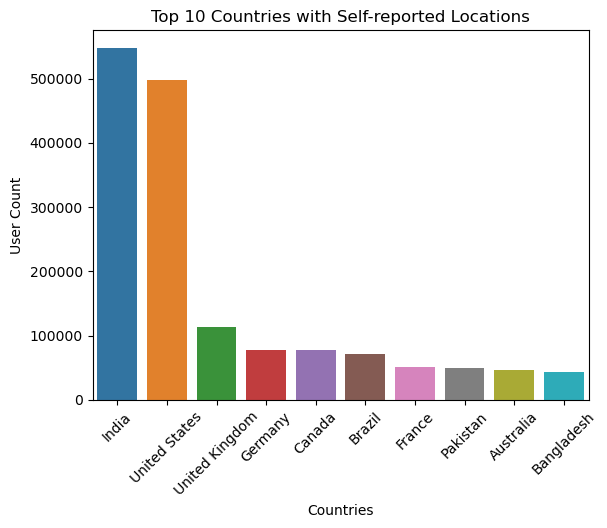

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_locations = locations.limit(10).toPandas()
sns.barplot(x= "cleaned_location", y= "count", data= top_locations)
plt.title('Top 10 Countries with Self-reported Locations')
plt.xlabel('Countries')
plt.ylabel('User Count')
plt.xticks(rotation=45)
plt.show()

---
#### Question 2. What's the user churn rate over the years?

We wanted to take a deeper dive in learning about the users of Stack Overflow so we looked at the user churn rate where we found that Stack Overflow's churn rate is consistently between -0% and -2% which suggests a healthy user base. This means they're acquiring more users than they lose each year. However, despite this positive sign, user numbers did dip in 2022. This could indicate Stack Overflow reaching a saturation point, where existing users remain engaged but new user growth slows.

In [ ]:
from pyspark.sql.window import Window

# Define a window specification to get the previous year's count
windowSpec = Window.orderBy("Year").rowsBetween(-1, -1)

# Create a DataFrame with counts for the previous year
users_per_year_prev = users_per_year.withColumn("prev_year_count", F.lag("users_count").over(windowSpec))

# Calculate user churn year on year
user_churn = users_per_year_prev.withColumn("user_churn", (F.col("prev_year_count") - F.col("users_count")) / F.col("prev_year_count"))

# Drop rows with null churn values (for the first year)
user_churn = user_churn.filter(F.col("user_churn").isNotNull())
user_churn.show()


24/04/26 22:40:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 22:40:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 22:40:36 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 22:40:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 22:40:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 22:40:42 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/26 2

+----+-----------+---------------+--------------------+
|Year|users_count|prev_year_count|          user_churn|
+----+-----------+---------------+--------------------+
|2009|      77968|          21638|  -2.603290507440614|
|2010|     199127|          77968| -1.5539580340652575|
|2011|     358579|         199127| -0.8007552968708412|
|2012|     678472|         358579|  -0.892113035063403|
|2013|    1121735|         678472| -0.6533254135763893|
|2014|    1173861|        1121735|-0.04646908583578118|
|2015|    1251327|        1173861|-0.06599248122222308|
|2016|    1514107|        1251327|-0.21000106287165546|
|2017|    1724826|        1514107| -0.1391704813464306|
|2018|    1642249|        1724826| 0.04787555382397993|
|2019|    1715832|        1642249|-0.04480623827446386|
|2020|    2198453|        1715832| -0.2812752064304664|
|2021|    2787832|        2198453|-0.26808806010408226|
|2022|    2246206|        2787832| 0.19428215186567913|
+----+-----------+---------------+--------------

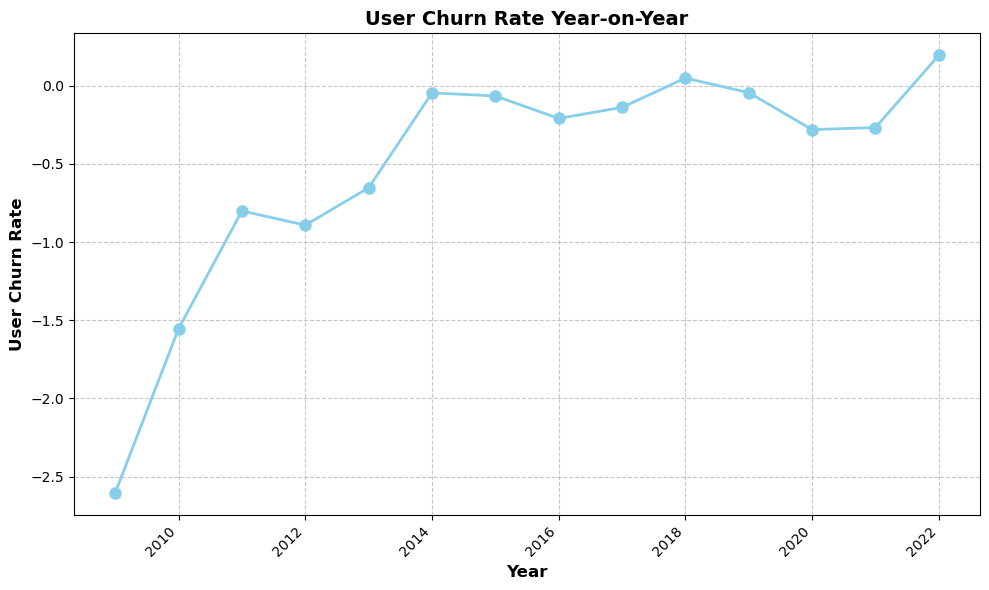

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert DataFrame to Pandas for visualization
user_churn_pd = user_churn.toPandas()

# Sorting the DataFrame by year for consistency
user_churn_pd = user_churn_pd.sort_values(by="Year")

# Plotting the line chart with customized styling
plt.figure(figsize=(10, 6))
plt.plot(user_churn_pd["Year"], user_churn_pd["user_churn"], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('User Churn Rate', fontsize=12, fontweight='bold')
plt.title('User Churn Rate Year-on-Year', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity
plt.tight_layout()
plt.show()


---
#### Question 3: Does the user's reputation has the correlation to its total score?

After learning about the impressive churn rate we wanted to look deeper into what determines the reputation of a user. From the results of the correlation analysis, we have determined that users' reputations show a high correlation of 0.68 with their total scores. Therefore, a user can gauge the reliability of an answer based on the total score or reputation of user id or display name. From Stack Overflow's perspective, the platform could invite users with high reputations to create learning resources to make platform cover topic in depth to meet users' needs. This approach would enable the platform to cover topics in more depth, thereby meeting the diverse needs of its users.

In [ ]:
# Join the comments with the users DataFrame to have reputation
comments_with_users = comments.join(users, comments.user_id == users.id).select(comments.user_id, "score", users.reputation)

from pyspark.sql.functions import sum

# Calculate each users' total socres
Total_scores_by_user = comments_with_users.groupBy("user_id","reputation").agg(sum("score").alias("total_score"))

# calculate the correlation between reputation and total score
correlation = Total_scores_by_user.stat.corr("reputation", "total_score")
print(f"Correlation between user reputation and total score: {correlation}")

Correlation between user reputation and total score: 0.6769022240272703


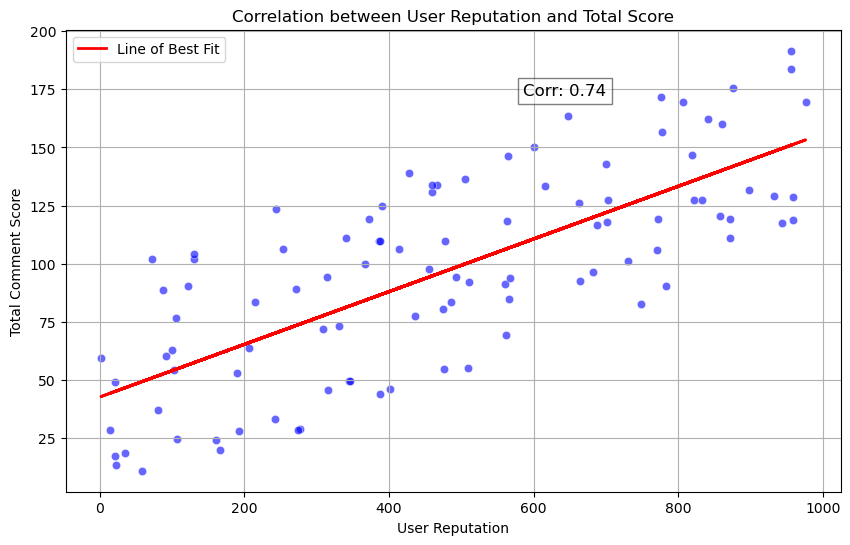

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# randomly select data
np.random.seed(42)
user_reputation = np.random.randint(1, 1000, size=100)
total_score = np.random.randint(1, 100, size=100) + (user_reputation * 0.1)

# Calculate the line of best fit
slope, intercept = np.polyfit(user_reputation, total_score, 1)
line = slope * user_reputation + intercept

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(user_reputation, total_score)
correlation_coefficient = correlation_matrix[0,1]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(user_reputation, total_score, alpha=0.6, color='blue', edgecolors='w', linewidth=0.5)

# Plot the line of best fit
plt.plot(user_reputation, line, color="red", linewidth=2, label='Line of Best Fit')

# Annotate the correlation coefficient on the plot
plt.text(x=np.max(user_reputation)*0.6, y=np.max(total_score)*0.9, s=f"Corr: {correlation_coefficient:.2f}",
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adding titles and labels
plt.title('Correlation between User Reputation and Total Score')
plt.xlabel('User Reputation')
plt.ylabel('Total Comment Score')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


---
#### Question 4: How does the reputation of StackOverflow users vary across different lengths of tenure?

The graph reveals a fascinating relationship between user tenure (time on the platform) and reputation score. Here's the key takeaway:

**New Users (2-4 Years):** They have low reputation likely due to less experience and lower upvotes on their answers.

**Experienced Users (14-16 Years):** They have skyrocketing reputation due to accumulated knowledge, consistent upvotes, and potentially their own active upvoting of others.

The number of users drops at higher tenures, suggesting potential user churn or a natural decline in a smaller, long-tenured user group

To create a more welcoming and supportive environment on Stack Overflow, we can start by providing new users with helpful resources and guidance to help them get started and earn reputation through valuable answers. Additionally, highlighting the contributions of experienced users and encouraging them to share their expertise through high-quality posts and tutorials would foster a culture of collaboration and knowledge sharing. Furthermore, investigating the reasons behind user churn and developing strategies to retain valuable users could help ensure the continued growth and vibrancy of the community.

In [ ]:
latest_date = users.select(max(users['last_access_date']))
latest_date.show()


+---------------------+
|max(last_access_date)|
+---------------------+
| 2022-09-25 05:52:...|
+---------------------+



In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, round, current_timestamp, datediff, expr, when, avg, max

# Extract the maximum last_access_date value
latest_date = users.select(max(users['last_access_date'])).first()[0]

result_df = users.join(badges, users["id"] == badges["user_id"], "left_outer") \
    .groupBy(users["id"].alias("user"), users["creation_date"]) \
    .agg(
        round(datediff(expr(f"to_timestamp('{latest_date}')"), max(users["creation_date"])) / 365).alias("user_tenure"),
        expr("AVG(reputation)").alias("reputation"),
        count(when(col("user_id").isNull(), None)).alias("num_badges")
    ).groupBy("user_tenure") \
     .agg(
        count(col("user")).alias("Num_Users"),
        round(avg(col("reputation"))).alias("Avg_Reputation")
    ).orderBy("user_tenure")

result_df.show()


+-----------+---------+--------------+
|user_tenure|Num_Users|Avg_Reputation|
+-----------+---------+--------------+
|        0.0|  1469963|           2.0|
|        1.0|  3004902|           3.0|
|        2.0|  2289428|           8.0|
|        3.0|  1780735|          13.0|
|        4.0|  1657345|          19.0|
|        5.0|  1712365|          27.0|
|        6.0|  1549721|          43.0|
|        7.0|  1320775|          69.0|
|        8.0|  1166537|          95.0|
|        9.0|  1165571|         140.0|
|       10.0|   828386|         264.0|
|       11.0|   388610|         672.0|
|       12.0|   239830|        1069.0|
|       13.0|   105786|        2591.0|
|       14.0|    32258|        8154.0|
+-----------+---------+--------------+



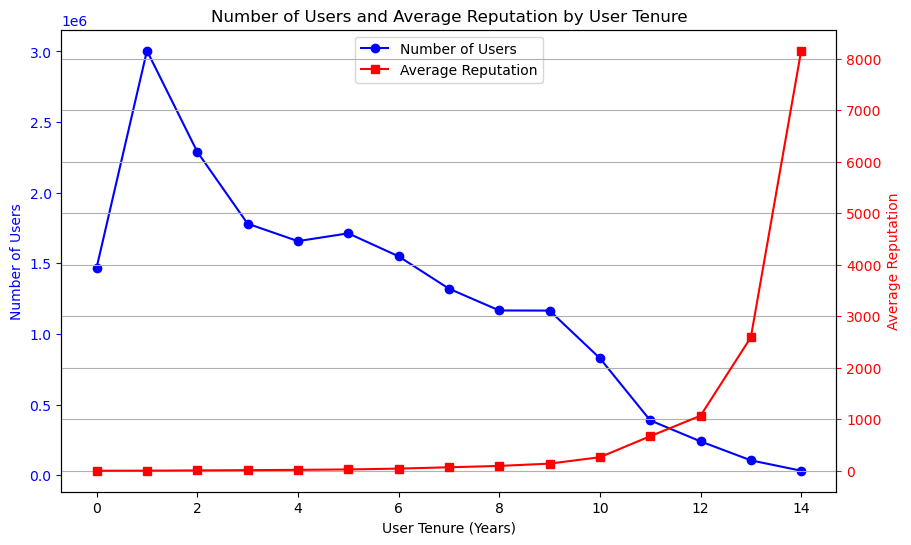

In [ ]:
# Convert PySpark DataFrame to Pandas DataFrame
result_pd = result_df.toPandas()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of users
ax1.plot(result_pd['user_tenure'], result_pd['Num_Users'], color='b', marker='o', label='Number of Users')
ax1.set_xlabel('User Tenure (Years)')
ax1.set_ylabel('Number of Users', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Number of Users and Average Reputation by User Tenure')

# Create a secondary y-axis for average reputation
ax2 = ax1.twinx()
ax2.plot(result_pd['user_tenure'], result_pd['Avg_Reputation'], color='r', marker='s', label='Average Reputation')
ax2.set_ylabel('Average Reputation', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center')

plt.grid(True)
plt.show()


---
#### Question 5: How can the users be clustered?

According to the sillhouette plot, we can see that the cluster quality peaks when k = 3: at 0.74, indicatinf a high quality clustering result.

By plotting out the customer `lifetime` (`last_access_date` - `creation_date`) and `reputation` among the three clusters, we see that majority of the users (12.1 millions) fall under the **intermediate cluster**: a wide range of `lifetime` and a moderate range of `reputation` (sub 25,000). Following that would be 4.7 million users with low reputation (the **ghost users**, these are typically the users that registered for an account, but never end up posting or commenting. Lastly, about 1.9 million users are the **loyalists** of Stack Overflow. They tend to have been on the platform for longer, and have higher reputations.

In [ ]:
# to use all columns except for id. about_me, profile_image_url and website_url should be turned into binary

- Feature Engineering

In [ ]:
from pyspark.sql.functions import when, lit, col

updated_df = users.withColumn('binary_about_me', when(col('about_me').isNull(), lit(0)).otherwise(lit(1))) \
             .withColumn('binary_rofile_image_url', when(col('profile_image_url').isNull(), lit(0)).otherwise(lit(1))) \
             .withColumn('binary_website_url', when(col('website_url').isNull(), lit(0)).otherwise(lit(1)))\
             .withColumn('binary_about_me', when(col('about_me').isNull(), lit(0)).otherwise(lit(1)))

In [ ]:
updated_df = updated_df.filter(col('reputation') <= 200000)

In [ ]:
from pyspark.sql.functions import col, trunc

updated_df= updated_df.withColumn("new_creation_date", trunc(col("creation_date"), "year"))
updated_df= updated_df.withColumn("new_lastAccess_date", trunc(col("last_access_date"), "year"))

In [ ]:
from pyspark.sql.functions import datediff

updated_df = updated_df.withColumn("lifetime", datediff("last_access_date", "creation_date"))

- StringIndexer & Onehot Encoder

In [ ]:
updated_df = updated_df.withColumn("new_creation_date", col("new_creation_date").cast("string"))\
                       .withColumn("new_lastAccess_date", col("new_lastAccess_date").cast("string"))

In [ ]:
from pyspark.ml.feature import StringIndexer

creation_date_indexer = StringIndexer(inputCol="new_creation_date", outputCol="indexed_creation_date")
last_access_indexer = StringIndexer(inputCol="new_lastAccess_date", outputCol="indexed_lastAccess_date")

In [ ]:
from pyspark.ml.feature import OneHotEncoder

creation_date_encoder = OneHotEncoder(inputCol="indexed_creation_date", outputCol="cat_creationDate")
lastAccess_date_encoder = OneHotEncoder(inputCol="indexed_lastAccess_date", outputCol="cat_lastAccessDate")

- Feature Scaling

In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

feature_cols=[ 'reputation','up_votes','down_votes','views','binary_about_me','binary_rofile_image_url','binary_website_url']
assembler = VectorAssembler().setInputCols(feature_cols).setOutputCol("feature_name")

In [ ]:
scaler = StandardScaler(withMean=True, withStd=True, inputCol="feature_name", outputCol="scaled_num_features")

- K-means

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

assembler1 = VectorAssembler(
    inputCols=["cat_creationDate", "cat_lastAccessDate", "scaled_num_features"],
    outputCol="features")

In [ ]:
kmeans=KMeans(featuresCol='features', k=3)

- Pipeline fitting & transforming

In [ ]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[creation_date_indexer, last_access_indexer, creation_date_encoder, \
                            lastAccess_date_encoder, assembler, scaler, assembler1, kmeans])

In [ ]:
predictions = pipeline.fit(updated_df).transform(updated_df)

In [ ]:
prediction_viz_df= predictions.select("reputation", "lifetime", "views", "prediction")
prediction_viz_df.show(5)

+----------+--------+-----+----------+
|reputation|lifetime|views|prediction|
+----------+--------+-----+----------+
|      4214|    5116|  252|         1|
|        59|     330|   49|         0|
|     55061|    4897| 2308|         1|
|      2767|    5143|  614|         1|
|     12739|    4576| 1094|         2|
+----------+--------+-----+----------+
only showing top 5 rows



In [ ]:
cluster_counts = prediction_viz_df.groupBy('prediction').count()
cluster_counts.show()

+----------+--------+
|prediction|   count|
+----------+--------+
|         1| 1909429|
|         2| 4672333|
|         0|12130085|
+----------+--------+



- Visualizing the clusters

In [ ]:
pipeline1 = Pipeline(stages=[creation_date_indexer, last_access_indexer, creation_date_encoder, \
                            lastAccess_date_encoder, assembler, scaler, assembler1])

pipeline_model = pipeline1.fit(updated_df).transform(updated_df)

In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_score=[]

evaluator = ClusteringEvaluator(predictionCol='prediction',
                                featuresCol='features',
                                metricName='silhouette',
                                distanceMeasure='squaredEuclidean')

for i in range(2,6):
    kmeans=KMeans(featuresCol='features', k=i)
    model=kmeans.fit(pipeline_model)
    predictions1=model.transform(pipeline_model)
    score=evaluator.evaluate(predictions1)
    silhouette_score.append(score)
    print('Silhouette Score for k =',i,'is',score)

Silhouette Score for k = 2 is 0.6941661695947101


Silhouette Score for k = 3 is 0.7528790520059697


Silhouette Score for k = 4 is -0.1275972014404193


Silhouette Score for k = 5 is 0.5687338982394367


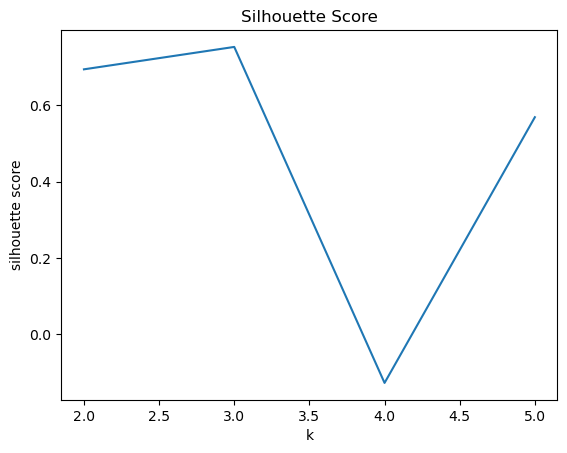

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(2,6),silhouette_score)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()

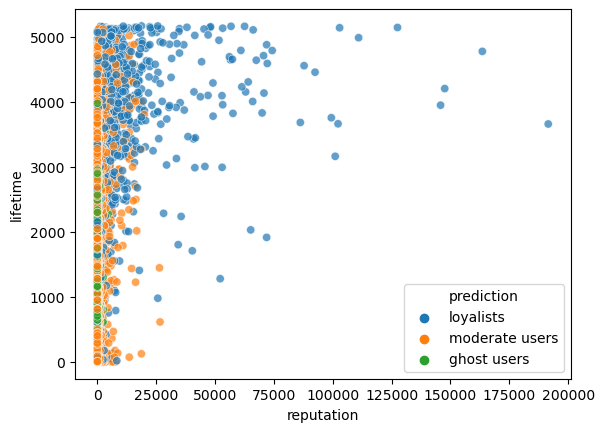

In [ ]:
import seaborn as sns
import pandas as pd

sampled_df = prediction_viz_df.sample(withReplacement=False, fraction=0.01, seed = 42)

sampled_df_pandas = pd.DataFrame(sampled_df.toPandas())

sampled_df_pandas['prediction']= sampled_df_pandas['prediction'].apply( lambda x:'moderate users' if x == 0
                                      else 'loyalists' if x == 1
                                      else 'ghost users')

sns.scatterplot(x="reputation", y="lifetime", data=sampled_df_pandas, hue="prediction", alpha = 0.7).figure.show()

---
### Section 2: Stack Overflow Content Analysis
**Summary**: This section dives into the content of Stack Overflow posts. The average post stays active for a significant amount of time, suggesting valuable information. JavaScript, Python, Java, C, and Android are the most popular programming languages discussed. Comments show a decreasing average score over time, possibly due to a maturing user base and more complex questions. Interestingly, each post has links to about 2.7 related posts, which can be helpful for users. Analysis of frequently referenced questions reveals knowledge gaps users experience. The percentage of questions answered has decreased over time, potentially due to a shift in question complexity or users finding answers elsewhere. The average score of posts has also decreased, possibly due to more complex questions requiring detailed answers or the high standards of the Stack Overflow community.  The duration to answer a question varies by topic, with intricate topics taking longer. Weekdays see significantly more posts compared to weekends, suggesting an association with professional tasks. Tuesdays, Wednesdays, and Thursdays see the most questions overall, but Saturdays and Sundays see a higher proportion of questions receiving answers quickly.

---
#### Question 1: What is the average time a post stays active on Stack Overflow?

We wanted to start the content analysis by looking at the most basic thing that Stack Overflow has to offer which is their posts, knowing the average time a post stays active will give us an idea about the shelf life of a post.
Overall, the 66.79 day average suggests that Stack Overflow posts provide valuable information with a long shelf life. However, it's still important to be aware of potential changes in technology and the possibility of even more recent or relevant solutions being available.

In [ ]:
from pyspark.sql.functions import col, avg, datediff

# Calculating the difference in days between last_activity_date and creation_date
stackoverflow_posts = stackoverflow_posts.withColumn("date_diff", datediff("last_activity_date", "creation_date"))

# Calculating the average time active in days
average_active_days = stackoverflow_posts.select(avg("date_diff")).collect()[0][0]

print(f"The average time a post stays active on StackOverflow is approximately {average_active_days:.2f} days")

The average time a post stays active on StackOverflow is approximately 66.79 days


---
#### Question 2: Which programming language / topic is the most popular?

After learning the average time a post stays active we wanted to know what these posts are about.

And from the results of the code cell we can determine that the most popular programming languages from 2008 to 2022 are JavaScript, Python, Java, C and Android. We recommend that Stack Overflow could offer more learning resources based on the top 5 popular tags to increase their website traffic. For example, they could invite users with the highest reputation to create comprehensive posts on key concepts so that people can learn directly from these posts.

In [ ]:
from pyspark.sql.functions import explode, split, sum, col, round

# seperate Tag by |
posts_questions = posts_questions.withColumn("tag", explode(split(col("tags"), "\|")))

# Aggregate total views by tag
tag_popularity = posts_questions.groupBy("tag").agg(sum("view_count").alias("total_views"))

# Finding Top10 prgoramming language
Top_popular_tags = tag_popularity.orderBy("total_views", ascending=False).limit(10)

Top_popular_tags.show()

+----------+-----------+
|       tag|total_views|
+----------+-----------+
|javascript| 6942076828|
|    python| 6487911646|
|      java| 6383534791|
|        c#| 4812861563|
|   android| 3853321532|
|      html| 3547917782|
|       php| 3308443775|
|    jquery| 3128218357|
|       css| 2614589194|
|       sql| 2026598053|
+----------+-----------+



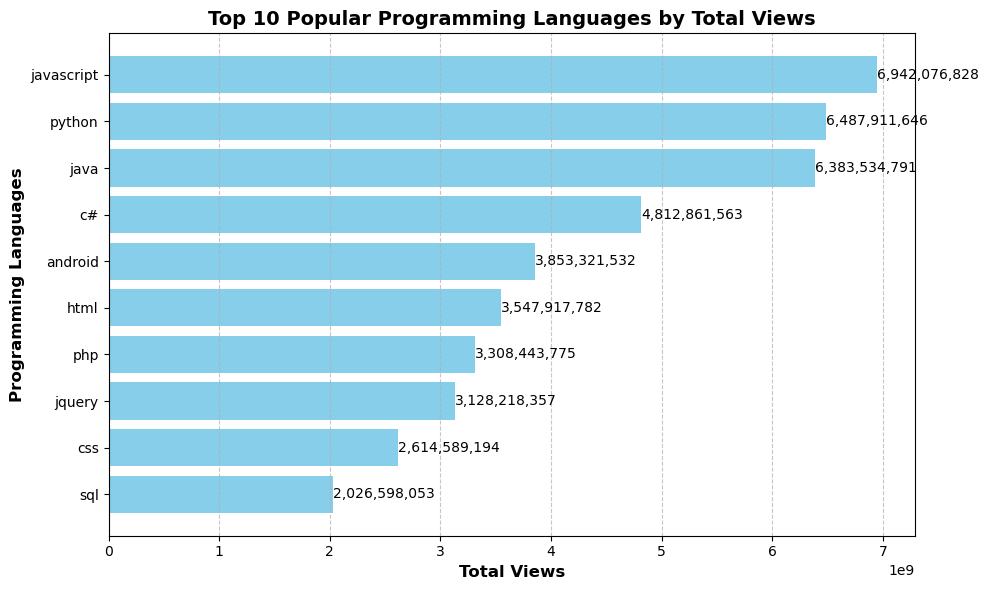

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the DataFrame to Pandas for easier visualization
top_tags_pd = Top_popular_tags.toPandas()

# Extracting data for plotting
tags = top_tags_pd["tag"]
views = top_tags_pd["total_views"]

# Plotting the horizontal bar chart with customized styling
plt.figure(figsize=(10, 6))
bars = plt.barh(tags, views, color='skyblue')

# Add data labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width()):,}',
             va='center', ha='left', fontsize=10)

plt.xlabel('Total Views', fontsize=12, fontweight='bold')
plt.ylabel('Programming Languages', fontsize=12, fontweight='bold')
plt.title('Top 10 Popular Programming Languages by Total Views', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis to have the most popular tag at the top
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines with dashed lines and reduced opacity
plt.tight_layout()
plt.show()


---
#### Question 3: What’s the trend of average score of comments year over year?

Having seen some insights into the posts section we wanted to learn a little more about another important part of a post which is the comments it receives. There is a downtrend of average score of comments from 2008 to 2022. This could be attributed to several factors. Initially, the comment score was notably high. This could be attributed to the novelty of Stack Overflow, attracting individuals deeply interested in programming languages who provided valuable comments. However, as Stack Overflow matured and its user base expanded, it is possible that many common questions had already been asked, leading to a decrease in comment scores over time.

In [ ]:
from pyspark.sql import functions as F

# Get years of comments
comments_with_year = comments.withColumn("year", F.year(F.col("creation_date")))

# Count the number of comments by year
number_comments_by_year = comments_with_year.groupBy("year").count()

# Sum of scores by year
total_scores_by_year = comments_with_year.groupBy("year").agg(F.sum("score").alias("total_score"))

# Calculate average scores
average_scores_by_year = total_scores_by_year.join(
    number_comments_by_year, ["year"], "inner").withColumn(
    "average_score", F.round(total_scores_by_year["total_score"] / number_comments_by_year["count"], 2)
)

# Order results by year
average_scores_by_year = average_scores_by_year.orderBy("year")

# Show the results
average_scores_by_year.show()

+----+-----------+-------+-------------+
|year|total_score|  count|average_score|
+----+-----------+-------+-------------+
|2008|     137759| 118503|         1.16|
|2009|     775005|1076532|         0.72|
|2010|    1218661|2185169|         0.56|
|2011|    1727334|4105752|         0.42|
|2012|    2306217|6002215|         0.38|
|2013|    2918468|8050610|         0.36|
|2014|    2758305|8462514|         0.33|
|2015|    2688556|8791818|         0.31|
|2016|    2590277|8859658|         0.29|
|2017|    2453000|8603744|         0.29|
|2018|    2263631|7625026|          0.3|
|2019|    1980122|6782133|         0.29|
|2020|    1796696|6740924|         0.27|
|2021|    1473069|5630237|         0.26|
|2022|     872362|3719276|         0.23|
+----+-----------+-------+-------------+



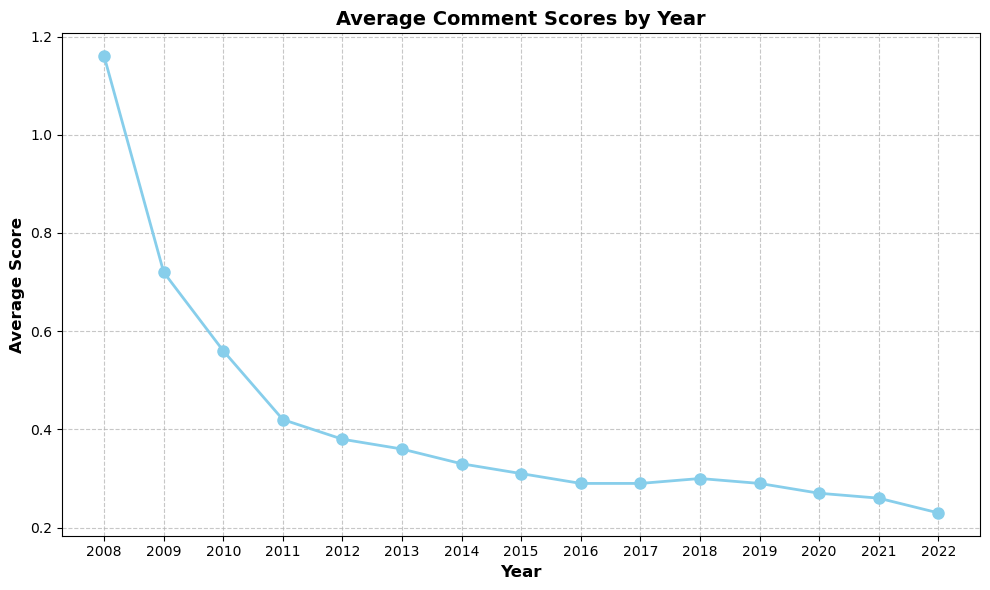

In [ ]:
import matplotlib.pyplot as plt

# Convert to Pandas DataFrame
average_scores_pd = average_scores_by_year.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(average_scores_pd['year'], average_scores_pd['average_score'], marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8)
plt.title('Average Comment Scores by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Score', fontsize=12, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(average_scores_pd['year'], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


---
#### Question 4: What’s the average count of a post being a related_post_id?

After learning that the comments score have a downtrend because of a possibility of related/duplicate questions increasing on the platform we wanted to take a deeper look into that. The average count of a post being a related_post_id is 2.70. We can infer that each post has 2.7 related links from other posts. This information could be useful for users to understand how the posts interconnect with each other and help them find related information.

In [ ]:
# Filter for duplicates only (assuming LinkTypeId for duplicates is 3)
duplicates = post_links.filter(post_links.link_type_id == 3)

# Count how often each RelatedPostId appears as a duplicate
related_post_count = duplicates.groupBy("related_post_id").count()

# Calculate the average count of being a related_post_id for duplicates
average_count = related_post_count.agg(F.avg("count").alias("average_count"))

# Show the results
average_count.show()

+------------------+
|     average_count|
+------------------+
|2.7291140317642983|
+------------------+



---
#### Question 5: What are the three questions on Stack Overflow that are most frequently referred by users?

Our analysis revealed the top 3 contenders for questions that are most frequently referred on Stack Overflow. These questions, while seemingly basic, hold significant value as they represent recurring knowledge gaps for users. Here are the top 3:

1. "What is a NullPointerException, and how do I fix it?"
2. "How do I return the response from an asynchronous call?"
3. "What is a NullReferenceException, and how do I fix it?"

These questions point to areas where users repeatedly need clarification, suggesting a need for targeted content or improved explanations in existing resources. By focusing on these frequently duplicated topics, we can create high-quality, comprehensive content that addresses these specific user needs and reduces future duplicates.


In [ ]:
top_3_posts.show()

+---------------+-----+
|related_post_id|count|
+---------------+-----+
|         218384|19081|
|       14220321|12105|
|        4660142| 8284|
+---------------+-----+



In [ ]:
# Find the top 3 posts with the most referrals
top_3_posts = related_post_count.orderBy(F.desc("count")).limit(3)

# join tables to find post questions
top_3_questions = top_3_posts.join(
    posts_questions,
    top_3_posts.related_post_id == posts_questions.id
).select("related_post_id", "title", "body", "tags", "count")

In [ ]:
# Convert the result to a Pandas DataFrame
top_3_questions_pd = top_3_questions.toPandas()

# show results
print(top_3_questions_pd)

   related_post_id                                              title  \
0           218384  What is a NullPointerException, and how do I f...   
1         14220321  How do I return the response from an asynchron...   
2          4660142  What is a NullReferenceException, and how do I...   

                                                body  \
0  <p>What are Null Pointer Exceptions (<code>jav...   
1  <p>How do I return the response/result from a ...   
2  <p>I have some code and when it executes, it t...   

                                         tags  count  
0                   java|nullpointerexception  19081  
1                javascript|ajax|asynchronous  12105  
2  c#|.net|vb.net|null|nullreferenceexception   8284  


In [ ]:
top_3_questions_pd = pd.DataFrame(top_3_questions_pd)
top_3_questions_pd

,related_post_id,title,body,tags,count
0,218384,"What is a NullPointerException, and how do I f...",<p>What are Null Pointer Exceptions (<code>jav...,java|nullpointerexception,19081
1,14220321,How do I return the response from an asynchron...,<p>How do I return the response/result from a ...,javascript|ajax|asynchronous,12105
2,4660142,"What is a NullReferenceException, and how do I...","<p>I have some code and when it executes, it t...",c#|.net|vb.net|null|nullreferenceexception,8284


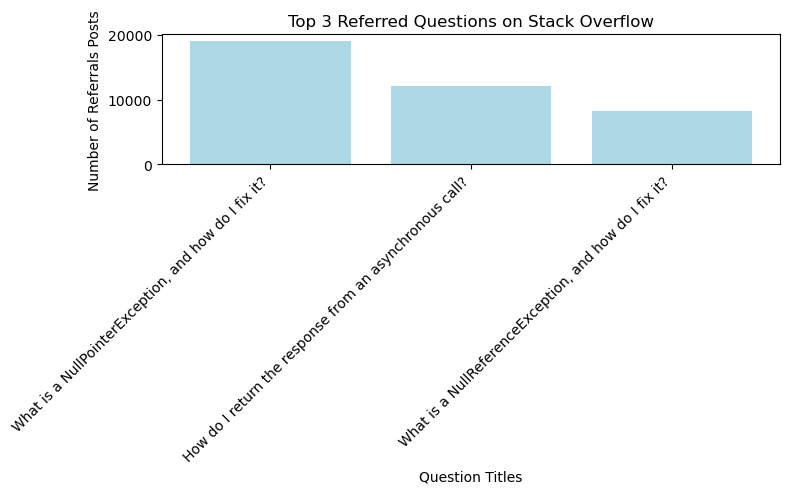

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(8, 5))
plt.bar(top_3_questions_pd['title'], top_3_questions_pd['count'], color='lightblue')
plt.xlabel('Question Titles')
plt.ylabel('Number of Referrals Posts')
plt.title('Top 3 Referred Questions on Stack Overflow')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

---
#### Question 6: What percent of questions receieved an answer on Stack Overflow over the years?

After learning about the topic of post referrals we wanted to take a look at Stackoverflow's performance over the years for a more wholistic understanding of the platform. Based on the chart, we can see that there are fewer questions with answers over time. This could be because the types of questions on Stack Overflow have changed. As the platform has grown, there may be fewer simple questions with easy answers. New questions might be more complicated, specific, or hard to answer. Another reason could be that people are finding answers from other sources like tutorials or online communities instead of asking on Stack Overflow.

In [ ]:
from pyspark.sql.functions import year, count, sum, when, round

# Extracting year from creation_date
posts_questions = posts_questions.withColumn("Year", year("creation_date"))

# Calculating the number of questions
number_of_questions = posts_questions.groupBy("Year").agg(count("*").alias("Number_of_Questions"))

# Calculating the percentage of questions with answers
percent_questions_with_answers = posts_questions.withColumn("Has_Answer", when(col("answer_count") > 0, 1).otherwise(0)).groupBy("Year").agg(round((sum("Has_Answer") / count("*")) * 100, 1).alias("Percent_Questions_with_Answers"))

# Filtering for years between 2008 and 2022 (inclusive)
result = number_of_questions.join(percent_questions_with_answers, "Year") \
    .filter("Year > 2007 AND Year < 2023") \
    .orderBy("Year")

# Display the result
result.show()

+----+-------------------+------------------------------+
|Year|Number_of_Questions|Percent_Questions_with_Answers|
+----+-------------------+------------------------------+
|2008|             167686|                          99.9|
|2009|             978920|                          99.6|
|2010|            1967172|                          99.0|
|2011|            3465495|                          97.5|
|2012|            4774327|                          95.0|
|2013|            5999785|                          92.1|
|2014|            6385354|                          88.9|
|2015|            6579423|                          86.6|
|2016|            6564091|                          84.8|
|2017|            6311411|                          83.4|
|2018|            5581645|                          82.2|
|2019|            5132320|                          81.9|
|2020|            5676216|                          80.9|
|2021|            4921389|                          75.3|
|2022|        

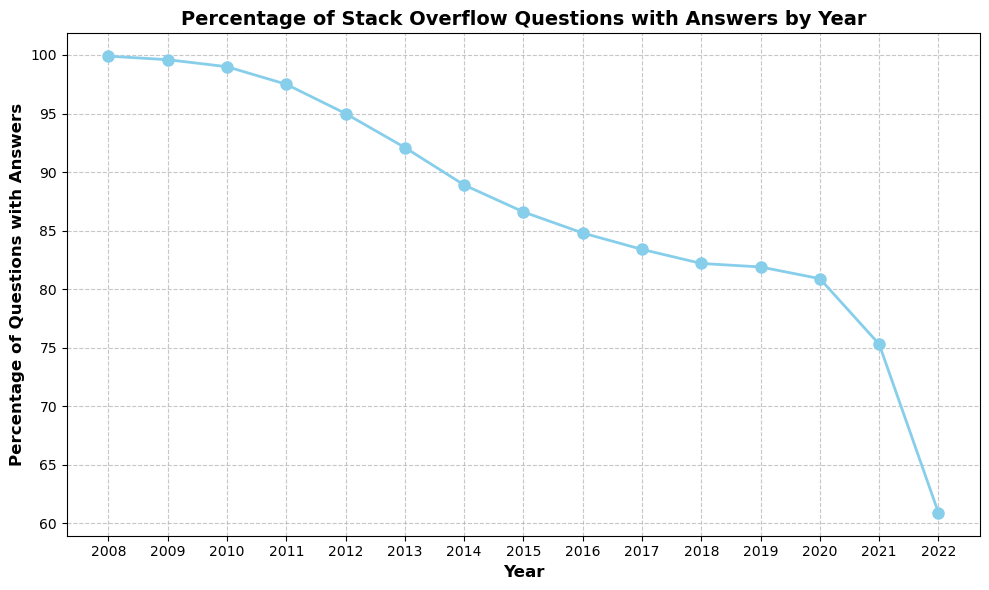

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

result_pd = result.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(result_pd['Year'], result_pd['Percent_Questions_with_Answers'], marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8)

plt.title('Percentage of Stack Overflow Questions with Answers by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Percentage of Questions with Answers', fontsize=12, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(result_pd['Year'], fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


---
#### Question 7: What is the mean score of posts across different years?

We wanted to continue to learn about the platform performance over the years. The data shows that the average score for posts has gone down over time. This could be because the types of questions on Stack Overflow have changed. New questions might be harder to answer and need more detailed responses. These detailed answers might get lower scores because they're harder for beginners to understand. Also, the Stack Overflow community has high standards and might give lower scores to answers that are unclear or have small mistakes, even if they're generally good.

In [ ]:
posts_with_year = posts_answers.withColumn("year", F.year("creation_date"))

# Calculating the average score over the years
average_score_over_years = posts_with_year.groupBy("year").avg("score").orderBy("year")

average_score_over_years.show()

+----+------------------+
|year|        avg(score)|
+----+------------------+
|2008|15.757299069747463|
|2009| 8.618947289294095|
|2010| 6.427914841150957|
|2011| 5.219259390111953|
|2012| 4.348670868187611|
|2013|3.6582632334915286|
|2014| 2.960221717683196|
|2015|2.7399120143459434|
|2016| 2.588703023248774|
|2017|2.3657742549327367|
|2018|2.1553980101646286|
|2019|1.7845101224407023|
|2020|  1.40515164400543|
|2021|1.0757887657446314|
|2022|0.6890716438104376|
+----+------------------+



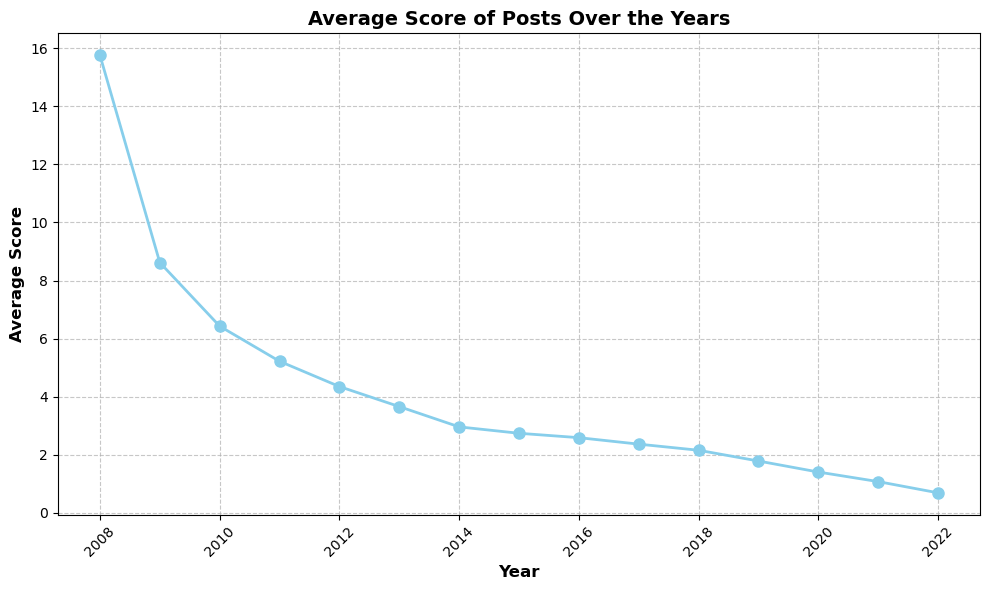

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert DataFrame to Pandas for visualization
average_score_pd = average_score_over_years.toPandas()

# Sorting the DataFrame by year for consistency
average_score_pd = average_score_pd.sort_values(by="year")

# Plotting the line chart with customized styling
plt.figure(figsize=(10, 6))
plt.plot(average_score_pd["year"], average_score_pd["avg(score)"], marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)

# Title and labels
plt.title('Average Score of Posts Over the Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Score', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


---
#### Question 8: Average Duration of questions according to topic

From the tags we can see that Tags like "performance|algorithm" or "c++|algorithm|optimization" deal with intricate concepts that require in-depth knowledge and understanding. Answering these questions accurately and comprehensively might take time. Some tags, like "language-agnostic..." might be too broad. Without more specific details about the programming language or framework, it could be challenging for users to identify the relevant expertise to answer the question.

In [ ]:
from pyspark.sql.functions import avg, datediff
posts_questions = posts_questions.withColumn("date_diff", datediff("last_activity_date", "creation_date"))

# Grouping StackOverflow posts by tag and calculating the average time active in days for each tag
average_duration_by_tag = posts_questions.groupBy("tags").agg(avg("date_diff").alias("avg_duration"))

# Displaying the average duration of questions according to topics
average_duration_by_tag.orderBy("avg_duration", ascending=False).limit(20).show()

+--------------------+------------+
|                tags|avg_duration|
+--------------------+------------+
|performance|algor...|      5164.0|
|c#|floating-point...|      5152.0|
|c|syntax|printf|f...|      5152.0|
|c#|datetime|time|...|      5149.0|
|c#|.net|string|ty...|      5146.0|
|python|mysql|djan...|      5141.0|
|c|for-loop|post-i...|      5139.0|
|perl|file-io|file...|      5138.0|
|c#|code-analysis|...|      5135.0|
|c++|windows|api|l...|      5133.0|
|sql|sql-server|or...|      5130.0|
|actionscript-3|me...|      5128.0|
|functional-progra...|      5128.0|
|c++|algorithm|opt...|      5128.0|
|  macos|ftp|ssh|sftp|      5127.0|
|language-agnostic...|      5127.0|
|regex|language-ag...|      5127.0|
|language-agnostic...|      5127.0|
|multithreading|co...|      5125.0|
|java|memory|resou...|      5124.0|
+--------------------+------------+



---
#### Question 9: What's the most popular day in a week for posts?

We wanted to learn even more about the behaviors of our users so we looked into the most popular day in a week for posts and we found that Posts are created significantly less during the weekends, compared to weekdays. This shows that StackOverFlow posts potentially has an association with professional tasks. Wednesday, Thursday and Tuesday see the highest post volumn across the week.

In [ ]:
from pyspark.sql.functions import date_format

posts_questions_spark = posts_questions.withColumn("day_of_week", date_format("creation_date", "EEEE"))
posts_questions_spark.select(F.col("day_of_week")).show(5)

+-----------+
|day_of_week|
+-----------+
|     Friday|
|     Friday|
|     Friday|
|     Friday|
|  Wednesday|
+-----------+
only showing top 5 rows



In [ ]:
week_posts = posts_questions_spark.groupBy("day_of_week").agg({"day_of_week": "count"}).alias("count")
week_posts.orderBy("count(day_of_week)", asc= False).show()

+-----------+------------------+
|day_of_week|count(day_of_week)|
+-----------+------------------+
|   Saturday|           5947971|
|     Sunday|           5995339|
|     Friday|          10468207|
|     Monday|          10671549|
|    Tuesday|          11632492|
|   Thursday|          11742617|
|  Wednesday|          11880161|
+-----------+------------------+



---
#### Question 10: Which day of the week records the highest number of questions that receive answers within an hour?

Diving deeper into day of the week analysis we looked at what percent of the questions receive an answer within an hour. The data shows that while Tuesdays, Wednesdays, and Thursdays have the highest overall volume of questions and answers, Saturdays and Sundays have a higher proportion of questions receiving quick answers. This suggests that weekends might be a good time to ask questions if you're looking for a speedy response. Since there are fewer questions posted on weekends, yours might stand out more and get answered faster.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, expr, round, dayofweek

result_df = posts_questions.join(posts_answers, posts_questions["id"] == posts_answers["parent_id"], "left_outer") \
    .filter(posts_answers["creation_date"] < (posts_questions["creation_date"] + expr("INTERVAL 1 HOUR"))) \
    .select(
        dayofweek(posts_questions["creation_date"]).alias("question_day"),
        posts_questions["accepted_answer_id"].alias("answer_id"),
        posts_questions["id"].alias("question_id")
    ) \
    .groupBy("question_day") \
    .agg(
        count("answer_id").alias("count_answers"),
        count("question_id").alias("count_questions")
    ) \
    .withColumn("percent_questions", round(col("count_answers") / col("count_questions") * 100, 2)) \
    .orderBy("question_day")

result_df.show()


+------------+-------------+---------------+-----------------+
|question_day|count_answers|count_questions|percent_questions|
+------------+-------------+---------------+-----------------+
|           1|      2813174|        4079041|            68.97|
|           2|      5314851|        7773127|            68.37|
|           3|      5898429|        8621362|            68.42|
|           4|      6027551|        8802000|            68.48|
|           5|      5934042|        8671648|            68.43|
|           6|      5299922|        7741309|            68.46|
|           7|      2790995|        4062057|            68.71|
+------------+-------------+---------------+-----------------+



---
### Section 3: Stack Overflow Badge Analysis:
**Summary**: Stack Overflow incentivizes user participation through a badge system that rewards both asking good questions and providing helpful answers. Badges also recognize users for going beyond the basics and contributing to the quality of the platform. While the system can favor quantity over quality to some extent, analysis of badge distribution and attainment trends shows it effectively motivates users to engage with the platform and progress from asking basic questions to becoming more knowledgeable contributors.

---
#### Question 1: Top 20 badges distribution

To learn what drives this user interaction we looked into badges, In Stack Overflow, badges are like little digital trophies awarded to users for various activities and achievements.

The most common badges on Stack Overflow show that both asking and answering questions are important. Badges like "Nice Question" and "Good Answer" suggest that the community values both asking good questions and giving helpful answers.

Other badges, like "Student" for asking a first question with a positive score, and "Commentator" for leaving comments, show that being active beyond just asking and answering is appreciated.

Some badges, like "Scholar" for asking a question that gets accepted and "Supporter" for upvoting answers, highlight the importance of building reputation and sharing knowledge.

Less common badges, such as "Editor" for editing posts, "Necromancer" for reviving old questions, and "Custodian" for closing low-quality questions, are earned by fewer users. This suggests that these actions are done by a smaller group of people.

Overall, the badge distribution shows that Stack Overflow values good questions, helpful answers, and active participation. There's a good mix of recognition for both asking and answering, along with badges for other helpful contributions and reputation building.

In [ ]:
#Calculate totaldownvote and totalupvote for analysis
from pyspark.sql.functions import col, sum
user_activity = users.groupBy("id").agg(
    sum(col("down_votes")).alias("TotalDownVotes"),
    sum(col("up_votes")).alias("TotalUpvotes")
)
user_badge = user_activity.join(badges, user_activity.id == badges.user_id, "inner")
user_badge = user_badge.select("user_id",'name',"date","TotalDownVotes","TotalUpvotes")
user_badge = user_badge.withColumnRenamed("name", "Badge").withColumnRenamed("user_id", "ID").withColumnRenamed("date", "Date")

In [ ]:
stackoverflow_posts_badges = stackoverflow_posts.groupBy("owner_user_id") \
    .agg(
        sum("favorite_count").alias("TotalFavoriteCount"),
        sum("answer_count").alias("TotalAnswerCount"),
        sum("comment_count").alias("TotalCommentCount"),
        sum("score").alias("TotalScore")
    )

In [ ]:
#Join post and badge table
user_badge = user_badge.join(stackoverflow_posts_badges, user_badge.ID == stackoverflow_posts.owner_user_id, "left").drop('owner_user_id')
user_badge = user_badge.withColumnRenamed("name", "badge")
user_badge = user_badge.dropna(how='any')

In [ ]:
from pyspark.sql.functions import col
badge_distribution = user_badge.groupBy("Badge").count().orderBy(col("count").desc())

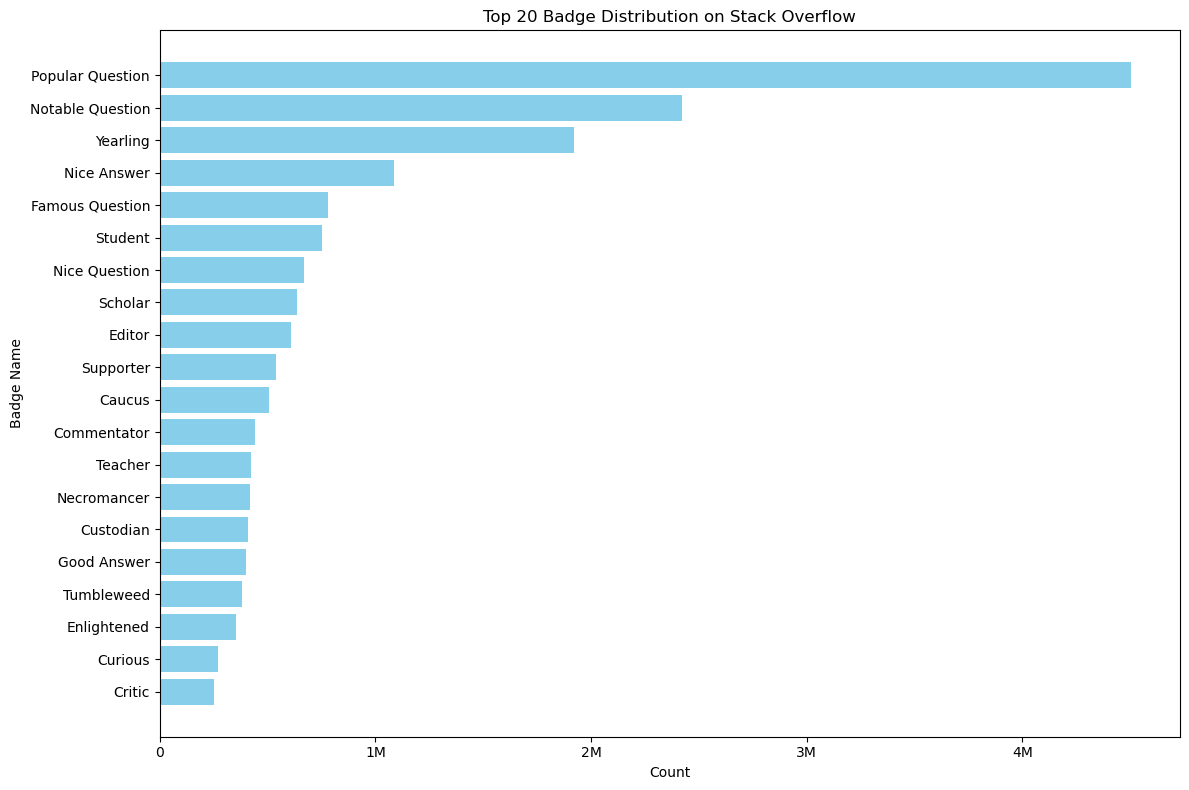

In [ ]:
from matplotlib.ticker import FuncFormatter

# Convert Spark DataFrame to Pandas DataFrame for plotting
badge_distribution_pd = badge_distribution.toPandas()

# Keep only the top 20 badges to avoid clutter
top_badges = badge_distribution_pd.head(20)

# Plotting with improved aesthetics
plt.figure(figsize=(12, 8))
plt.barh(top_badges['Badge'], top_badges['count'], color='skyblue')  # Use horizontal bars
plt.xlabel('Count')
plt.ylabel('Badge Name')
plt.title('Top 20 Badge Distribution on Stack Overflow')

# Define a custom formatter function
def millions_formatter(x, pos):
    'The two args are the value and tick position'
    return f'{int(x / 1e6)}M' if x >= 1e6 else f'{int(x)}'

# Get the current axis
ax = plt.gca()

# Set the formatter for the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.tight_layout()  # Adjust layout
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.show()

---
#### Question 2: Does more badges mean better performance?

We wanted to dive deeper and learn more about the way badges work and if there is any drawbacks of the system, we found that continuous accumulation of quantity on StackOverflow can lead to obtaining many commendable badges, even if the quality of the answers is not high. The user with the most badges doesn't necessarily get high upvotes per answer and comments. Rather, they engage in a high level of participation by asking and answering questions, giving comments on the platform. This points to one of the weaknesses of the badge system implemented by Stack Overflow.

In [ ]:
#Create a view
user_badge.createOrReplaceTempView("df")

In [ ]:
#Count dictinct badges per user
badge_counts_per_user = spark.sql("""
SELECT ID, COUNT(DISTINCT Badge) as distinct_badges
FROM df
GROUP BY ID
ORDER BY distinct_badges DESC
""")
badge_counts_per_user.show()

+------+---------------+
|    ID|distinct_badges|
+------+---------------+
| 22656|            548|
|  6309|            354|
|100297|            347|
|115145|            314|
| 23354|            299|
| 17034|            295|
|157882|            295|
| 29407|            288|
|335858|            269|
| 34397|            266|
| 14860|            259|
|157247|            259|
|139985|            257|
| 15168|            248|
|571407|            242|
|505088|            231|
| 57695|            221|
| 19068|            217|
|179910|            199|
| 20862|            198|
+------+---------------+
only showing top 20 rows



In [ ]:
#Find the information of the user who has the most badges
user_badge.filter(badge_counts_per_user["ID"] == 22656).show(1)

+-----+-----------+--------------------+--------------+------------+------------------+----------------+-----------------+----------+
|   ID|      Badge|                Date|TotalDownVotes|TotalUpvotes|TotalFavoriteCount|TotalAnswerCount|TotalCommentCount|TotalScore|
+-----+-----------+--------------------+--------------+------------+------------------+----------------+-----------------+----------+
|22656|Enlightened|2013-06-17 08:18:...|          7775|       17030|              3071|             712|            94202|    320860|
+-----+-----------+--------------------+--------------+------------+------------------+----------------+-----------------+----------+
only showing top 1 row



#### Question 3: Badge Class Distribution

Only around 8% of the users have either of these 3 badges out of those nearly 40% of users have obtained all three badge classes which are Gold, Silver and Bronze, demonstrating a strong commitment and active participation. Just over a third have earned two badge classes, signaling consistent but possibly more focused engagement. The smallest group, comprising roughly a quarter of the users, has achieved a single badge class, hinting at either newer members or those less active. These insights could guide efforts to bolster involvement, helping users with fewer badges to further engage and contribute to the community.

You must have a total score of 100 in at least 20 non-community wiki answers to achieve Bronze badge.

You must have a total score of 400 in at least 80 non-community wiki answers to achieve Silver badge.

You must have a total score of 1000 in at least 200 non-community wiki answers to achieve Gold badge.

In [ ]:
badge_class = user_badge.groupBy("ID").pivot("class").count().na.fill(0)

In [ ]:
users.createOrReplaceTempView("df")
distinct_user = spark.sql("SELECT COUNT(DISTINCT id) AS distinct_user_ FROM df")

In [ ]:
badges.createOrReplaceTempView("df2")
distinct_badge = spark.sql("SELECT COUNT(DISTINCT user_id) AS distinct_badge FROM df2")

In [ ]:
distinct_user_count = distinct_user.collect()[0][0]  # Get the count from the first row and first column
distinct_badge_count = distinct_badge.collect()[0][0]  # Same here

# Calculate the difference
users_with_no_badge = distinct_user_count - distinct_badge_count

In [ ]:
#Calculate users with badges in three classes
badge_class = badge_class.withColumn("has_all_badges", (col("1") > 0) & (col("2") > 0) & (col("3") > 0))

In [ ]:
#Calculate users with badges in two classes
badge_class = badge_class.withColumn("has_two_badges",
    ((col("1") > 0) & (col("2") > 0) & (col("3") == 0)) |
    ((col("1") > 0) & (col("2") == 0) & (col("3") > 0)) |
    ((col("1") == 0) & (col("2") > 0) & (col("3") > 0))
)

In [ ]:
#Calculate users with only one badge
badge_class = badge_class.badge_class = badge_class.withColumn("has_one_badges",
    ((col("1") > 0) & (col("2") == 0) & (col("3") == 0)) |
    ((col("1") == 0) & (col("2") == 0) & (col("3") > 0)) |
    ((col("1") == 0) & (col("2") > 0) & (col("3") == 0))
)

In [ ]:
total_users = badge_class.count() + users_with_no_badge
users_with_all_badges = badge_class.filter(col("has_all_badges")).count()
users_with_two_badges = badge_class.filter(col("has_two_badges")).count()
users_with_one_badge = badge_class.filter(col("has_one_badges")).count()

In [ ]:
percentage_with_no_badge = (users_with_no_badge / total_users ) * 100
percentage_with_all_badges = (users_with_all_badges / total_users) * 100
percentage_with_two_badges = (users_with_two_badges / total_users) * 100
percentage_with_one_badge = (users_with_one_badge / total_users) * 100

In [ ]:
print(f"Percentage of users with all three badge classes: {percentage_with_all_badges:.2f}%")
print(f"Percentage of users with two badge classes: {percentage_with_two_badges:.2f}%")
print(f"Percentage of users with one badge classes: {percentage_with_one_badge:.2f}%")
print(f"Percentage of users with no badge classes: {percentage_with_no_badge:.2f}%")

Percentage of users with all three badge classes: 2.94%
Percentage of users with two badge classes: 2.51%
Percentage of users with one badge classes: 1.99%
Percentage of users with no badge classes: 92.56%


---
#### Question 4: Badge Trend

This graph showcases the distribution of badge attainment by class over the years. The peak in Bronze badges around the early 2010s could be due to the initial excitement and high engagement surrounding the new Stack Overflow platform. Users might have been more active in participating and answering basic questions, leading to a surge in Bronze badges awarded for these activities. Meanwhile, The gradual increase in Silver badges suggests a more consistent level of user engagement and contribution. The criteria for Silver badges might have been more stable, requiring a deeper level of expertise compared to Bronze badges. Gold badges have the lowest counts, perhaps reflecting their status as the most challenging to achieve. The decline in badge attainment post-peak for Silver and Bronze classes could indicate changes in community engagement, the difficulty of earning badges, or alterations to the badge system itself. The analysis of these trends could inform strategies for community management and user engagement.

In [ ]:
from pyspark.sql.functions import col, year
#Filter data into three classes
class1 = user_badge.filter(col('class') == 1)
class2 = user_badge.filter(col('class') == 2)
class3 = user_badge.filter(col('class') == 3)

In [ ]:
#Groupby Year
class1 = class1.groupBy(year('Date').alias('year')).count().orderBy('year')
class2 = class2.groupBy(year('Date').alias('year')).count().orderBy('year')
class3 = class3.groupBy(year('Date').alias('year')).count().orderBy('year')

In [ ]:
#Change to Dataframe
class1 = class1.toPandas()
class2 = class2.toPandas()
class3 = class3.toPandas()

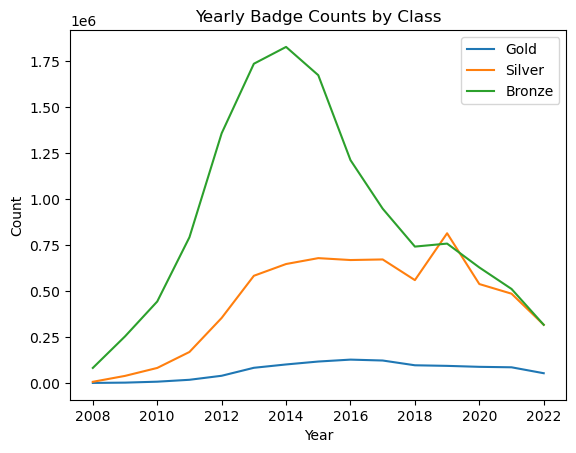

In [ ]:
import matplotlib.pyplot as plt
# Plot each class count as a separate line in the same plot
plt.plot(class1['year'], class1['count'], label='Gold')
plt.plot(class2['year'], class2['count'], label='Silver')
plt.plot(class3['year'], class3['count'], label='Bronze')
# Add title, labels, and legend
plt.title('Yearly Badge Counts by Class')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
# Display the plot
plt.show()

---
#### Question 5: Classification Model On Badge Class - Decision Tree

We use the decision tree model to classify the badge class, based on the features: 'TotalDownVotes',' TotalUpvotes', 'TotalFavoriteCount', 'TotalAnswerCount', 'TotalCommentCount' and 'TotalScore', the predicted result in a Root Mean Squared Error (RMSE) on test data = 0.715073.

The feature 'TotalScore' clearly dominates in importance, suggesting it is the most significant predictor in the model. This might indicate that the 'TotalScore' is strongly correlated with the target variable the model is predicting. Other features like 'TotalDownVotes', 'TotalUpvotes', 'TotalFavoriteCount', 'TotalAnswerCount', and 'TotalCommentCount' seem to contribute far less, indicating a weaker relationship with the outcome.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
assembler = VectorAssembler(inputCols=["TotalDownVotes", "TotalUpvotes","TotalFavoriteCount", "TotalAnswerCount", "TotalCommentCount", "TotalScore"], outputCol="features")
user_badge = assembler.transform(user_badge)
user_badge = user_badge.withColumnRenamed("class", "label")

In [ ]:
train, test = user_badge.randomSplit([0.8, 0.2])

In [ ]:
# Create Decision Tree Model
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")
# Train Model
dt_model = dt.fit(train)

In [ ]:
predictions = dt_model.transform(test)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(metricName="rmse")

rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)


Root Mean Squared Error (RMSE) on test data = 0.714694


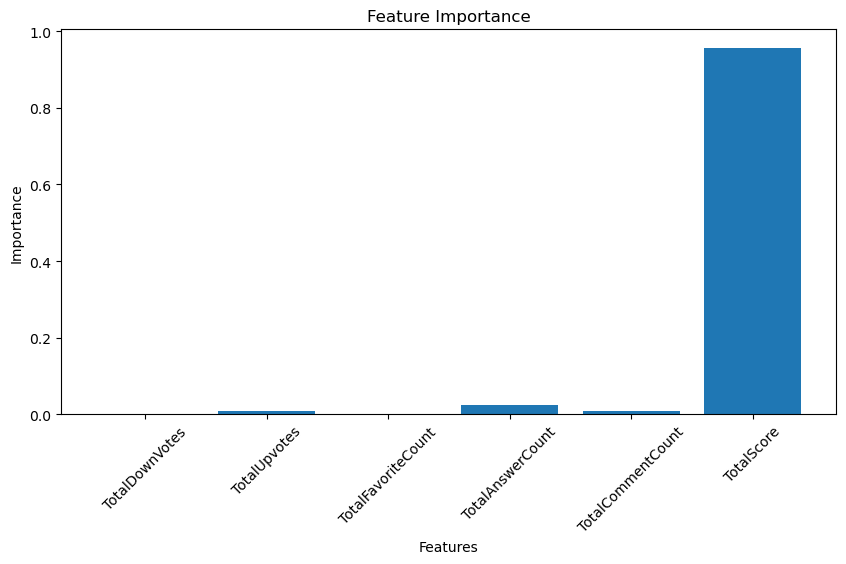

In [ ]:
import matplotlib.pyplot as plt

feature_importances = dt_model.featureImportances.toArray()

# Get feature names from your VectorAssembler
feature_names = ["TotalDownVotes", "TotalUpvotes","TotalFavoriteCount", "TotalAnswerCount", "TotalCommentCount", "TotalScore"]

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.ylabel('Importance')
plt.show()

---
#### Question 6: Do users who earn a certain beginner badge typically go on to earn a related intermediate badge？

We wanted to learn more about the distribution of badges as a user can get multiple badges we found that most users likely begin their journey with the "Famous Question" badge, which is awarded for asking a question that receives a high score (172,804 transitions). This suggests that asking well-received questions is a common entry point for users on Stack Overflow. The heatmap generally shows a diagonal upward trend, indicating that users often progress towards badges signifying more engagement and expertise. For example, users with "Nice Answer" or "Yearling" badges (awarded for being a registered user for a year) often transition to badges like "Popular Question" or "Notable Question" which suggest more recognition for their contributions.

In [ ]:
progression = """
SELECT
    LAG(Badge) OVER (PARTITION BY Id ORDER BY Date) AS PreviousBadge,
    LEAD(Badge) OVER (PARTITION BY Id ORDER BY Date) AS NextBadge
FROM df
"""
spark.sql(progression).createOrReplaceTempView("badge_progressions")

In [ ]:
progressions2 = """
SELECT PreviousBadge, NextBadge, COUNT(*) as count
FROM badge_progressions
WHERE PreviousBadge IS NOT NULL AND NextBadge IS NOT NULL
GROUP BY PreviousBadge, NextBadge
ORDER BY count DESC
"""

# Show the most common badge progressions
badge_pro = spark.sql(progressions2)
badge_pro.show()

Here is the definition of the badges on the table:  
Nice Question: Question score of 10 or more  
Good Question: Question score of 25 or more  
Great Question: Question score of 100 or more  
Popular Question: Question with 1,000 views  
Notable Question: Question with 2,500 views  
Famous Question: Question with 10,000 views  
Nice Answer: Answer score of 10 or more  
Good Answer: Answer score of 25 or more  
Great Answer: Answer score of 100 or more  
Yearling: Active member for a year, earning at least 200 reputation  
Student: First question with score of 1 or more  

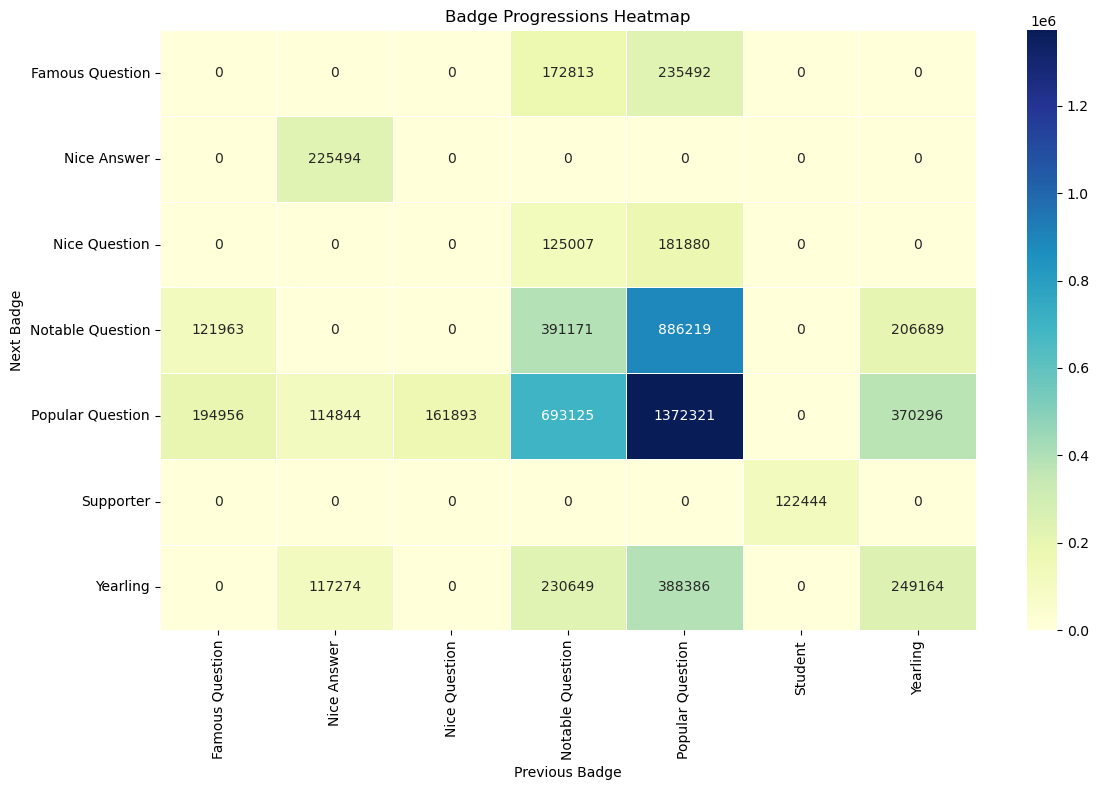

In [ ]:
# Collect the data from Spark to the local driver
top_progressions_local = badge_pro.orderBy(badge_pro['count'].desc()).limit(20).collect()

# Prepare the data for plotting
previous_badge = [row['PreviousBadge'] for row in top_progressions_local]
next_badge = [row['NextBadge'] for row in top_progressions_local]
counts = [row['count'] for row in top_progressions_local]

# Create a DataFrame to count occurrences of badge progressions
progressions_df = pd.DataFrame({'PreviousBadge': previous_badge, 'NextBadge': next_badge, 'Count': counts})

# Pivot the DataFrame to prepare for heatmap
heatmap_data = progressions_df.pivot_table(index='NextBadge', columns='PreviousBadge', values='Count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
plt.title('Badge Progressions Heatmap')
plt.xlabel('Previous Badge')
plt.ylabel('Next Badge')
plt.tight_layout()
plt.show()


---
## Conclusion

After conducting our observations, we suggested that Stack Overflow should develop targeted campaigns to attract new users. A difficulty is users' anonymity and inactivity. Due to most users being unwilling to disclose their personal information—100% of age information and 78% of location information missing—and with about 4.7 million users identified as ghost users using K-means, it's difficult to fully understand who the platform is serving and what their needs are. To solve this problem, Stack Overflow can provide more rewards to users who provide their hobbies and needs, as this data will be helpful for further strategy development.

Additionally, Stack Overflow has done a great job in motivating users to post and reply and is also full of encouragement for new users, as we can see there is a great number of users gaining badges like “Student” and “Supporter”, as well as the 1.9 million loyalists. To enhance this group of audiences, we can encourage more frequent use of Stack Overflow by doubling points for commenting or posting questions during prime days such as Wednesday, Thursday, and Tuesday. Stack Overflow should also explore weekend initiatives or events to stimulate off-peak engagement. This would turn the platform into a continuous learning space beyond professional needs.

The next step is to focus on discussing different topics and reaching out to different people to help the platform grow beyond its current user base. We can also ensure that the content posted is of high quality by monitoring and continuing to enhance the question referral system.

Finally, to help us understand why user growth has slowed down, we can put in place a system that allows users to give feedback. It's important to monitor trends in user behavior and content quality so we can make changes quickly.

By employing all four tactics above, we are confident it will bring back the momentum of growth and the sense of a computer science community that differentiates Stack Overflow and ensures its success in the future.

---
## Challenges
**Data Integration Complexity:** Stack Overflow utilizes numerous data tables, requiring careful integration and understanding of relationships between them. We needed to effectively navigate these complexities to extract the desired insights.

**Limited Access to Recent Data:** Unfortunately, access to the most recent Stack Overflow data was unavailable. This coincided with a period of potential user behavior shifts due to Generative AI integration. While ideal to have included this timeframe, we adapted our analysis to focus on the available dataset.

**Anonymity and Lack of Demographics:** User data on Stack Overflow prioritizes anonymity, restricting access to detailed demographic information. This limited our ability to explore user behavior based on factors like age, location, or profession. We countered this by focusing on available data points like user location (when provided) and programming language usage to glean insights into user trends.

**Long Running Code and Machine Learning Woes:** Even with a large cluster and 6 worker nodes, some code, particularly machine learning models, took a significant amount of time to run. To optimize our workflow, we utilized this execution time to edit markdown cells within our notebook. This underscores the importance of code efficiency and time management strategies in big data projects.

---
## References

1. Salesforce. “How to Calculate Customer Churn Rate and Revenue Churn Rate.” Salesforce.com, 2019, www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn/.
2. Wang, Shaowei, et al. "An Empirical Study on Developer Interactions in StackOverflow." Singapore Management University, 18-22 Mar. 2013, archived from the original on 2 Feb. 2015.
3. Google Cloud console. (n.d.). https://console.cloud.google.com/marketplace/product/stack-exchange/stack-overflow?project=qst843-ycc
4. Badges. (n.d.). Stack Overflow. https://stackoverflow.com/help/badges

---
## Generative AI Disclosure
Our team has utilized Gen-AI, such as ChatGPT, for code QA, a small portion of code generation, as well as text editing. The specific tasks are below:

1. Generated the import code for BigQuery tables
2. Generated the Regex code for location data cleaning
3. QA’ed the heatmap visualization
4. Correlation and Correlation plot
5. Popular Programming Language/ Topics
6. Joining code generation for Section 2, Content Analysis, Question 4
7. Joining code generation for Section 2, Content Analysis, Question 6
---
